In [1]:
from __future__ import print_function

import sys
import socket

sys.path.extend(['/home/jorg/repo/model_evaluation'])

import matplotlib
import matplotlib.pyplot as plt
import copy
import numpy as np
import torch
import os
import glob

from plotting.color_maps import transparent_cmap 
from eval_detection.simulate_correction import SimulateExpert
from networks.detection.general_setup import config_detector
from utils.common import loadExperimentSettings

mycmap = transparent_cmap(plt.get_cmap('plasma'))

%matplotlib inline
%load_ext autoreload
%autoreload 2
print("Ready")

Ready


# Checklist before running evaluation of region detector

-  Run evaluation of segmentation model for all four 4 folds. Use notebook __new_eval__ (eval_segmentations folder).
-  Check: do you need to copy the pred_labels, u-maps files to the main data directory from which the data-handler will load the results?
-  Generate the distance transform maps. Make sure you save them in a directory in which they are identified by the directory name (e.g. 4mm all tissue classes etc). Please see notebook __determine_error_margins__.
-  Generate the target labels (i.e. target roi's) for the supervised detection task. Please see notebook __determine_error_margins__.
-  **Generating heat maps:** Use the __test_detector_model__ notebook to generate the heat map for the model you want to evaluate (use same __type_of_map__, __dt_config_id__ and __eval_run_id__). The generated heat maps can be found in ~/models/model_name/heat_maps/type_of_map/dt_config_id/eval_run_id/

# Run simulation for a separate fold

In [10]:
model_dirs = {"drn_mc_ce": {'emap': "f1_rsn_umap_05_008_0806_191512",  
                            'bmap': "f0_rsn_mc_bmap_05_008_0807_145018",
                            "mronly": {}  
                           },
              "dcnn_mc_brier": {"emap": "f0_rsn_emap_05_01_0807_171442"},  
              "dcnn_mc_dice": {"emap": "f0_rsn_emap_08_0085_0816_130625"},
              "unet_mc_ce":   {"emap": "f0_rsn_umap_04_008_0802_161310"},
              "unet_mc_dice":  {"emap": "f0_rsn_emap_08_0085_0812_180141",
                                 "bmap": "f1_rsn_mc_bmap_08_0085_0813_085607"}
             }

In [14]:

# IMPORTANT -->>> Must match the directories that contain dt_maps and target_labels for detection
# ALSO HEAT MAPS directory listens to this ID
seg_model = "dcnn_mc"
loss_function = "dice"
input_channels = "emap"
model_tag = seg_model + "_" + loss_function


exper_tag = model_dirs[model_tag][input_channels]
print(exper_tag)

src_exper_dir = os.path.expanduser("~/expers/acdc/" + model_tag + "/dt_logs/" + exper_tag)
model_settings = loadExperimentSettings(os.path.join(src_exper_dir, 'settings.yaml'))

if input_channels != model_settings.input_channels:
    raise ValueError("ERROR - input_channels parameter mismatch".format(input_channels))
fold = model_settings.fold
    
eval_run_id = input_channels
# We only need to run this once for a specific dt_config_id, the eval_run_id does not matter
correct_all_seg_errors = False
do_save = False
# Actually we only need to evaluate the baseline once
evaluate_baseline = False if correct_all_seg_errors else True

patient_ids = ["patient018", "patient037"] 
# ["patient017", "patient018", "patient019", "patient020"] 

sim_expert = SimulateExpert(src_exper_dir, 
                            patient_ids=patient_ids, verbose=False, 
                            correct_all_seg_errors=correct_all_seg_errors)
sim_expert.evaluate_detections(evaluate_baseline=evaluate_baseline, save_new_labels=True)
  
if do_save:    
    sim_expert.save()

print("Ready")


Evaluate with detection:   0%|          | 0/2 [00:00<?, ?it/s]

f0_rsn_emap_08_0085_0816_130625
INFO - Working with settings model: rsn fold: 0 dropout: False dt_config: fixed_46_31 input-channels: emap
WARNING - Load heat maps from /home/jorg/expers/acdc/dcnn_mc_dice/dt_logs/f0_rsn_emap_08_0085_0816_130625/heat_maps
Warning - Using heat maps: True 


Evaluate with detection: 100%|██████████| 2/2 [00:06<00:00,  3.42s/it]

Dice 
[0.         0.837166   0.90552532 0.8885492  0.         0.94297931
 0.87009544 0.94936129]
Baseline DSC
[0.         0.45797698 0.84984244 0.78862726 0.         0.85387195
 0.85607918 0.94566236]
HD 
[ 0.         14.54587255 14.79562412  7.21030921  0.         15.82155707
  8.10547501  3.62487862]
Baseline HD
[ 0.         34.65530474 19.91441239 11.0281303   0.         15.82155707
  8.10547501  4.90876921]
Ready


In [34]:
seg_model = "drn_mc_ce"
input_channels = "emap"

model_tag = model_dirs[seg_model][input_channels]
print("Using model: {} / {} => {}".format(seg_model, input_channels, model_tag))

Using model: drn_mc_ce / allchannels => f0_rsn_07_008_20190725_162057


# Load results and determine p-values for possible manual corrections of segmentation inaccuracies

-  Make sure the root directory and the file names are correct. By default, we load three different scenarios 
     1.  The base line model without detection 
     2.  Evaluation of predictions when we would detect all (filtered) target labels that we identified as "to-be-detected" based on the distance transform maps 
     3.   Evaluation of predictions taking the generated __heat_maps__ of the detection model into account.

# Load results for ALL folds (specific model + loss function)

WARNING - Loading results from /home/jorg/expers/acdc/dcnn_mc_brier/sim_results/emap/sim_expert_base_fall_n200.npz
WARNING - Loading results from /home/jorg/expers/acdc/dcnn_mc_brier/sim_results/emap/sim_expert_allerrors_fixed_46_31_fall_n200.npz
WARNING - Loading results from /home/jorg/expers/acdc/dcnn_mc_brier/sim_results/emap/sim_expert_fixed_46_31_emap_fall_n200.npz
WARNING - Loading results from /home/jorg/expers/acdc/dcnn_mc_brier/sim_results/emap/sim_expert_base_fall_n200.npz
WARNING - Loading results from /home/jorg/expers/acdc/dcnn_mc_brier/sim_results/emap/sim_expert_allerrors_fixed_46_31_fall_n200.npz
WARNING - Loading results from /home/jorg/expers/acdc/dcnn_mc_brier/sim_results/emap/sim_expert_fixed_46_31_emap_fall_n200.npz


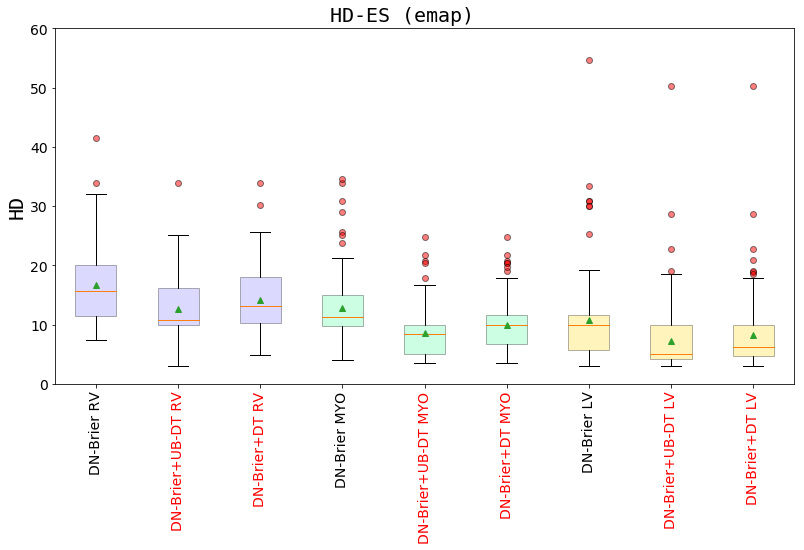

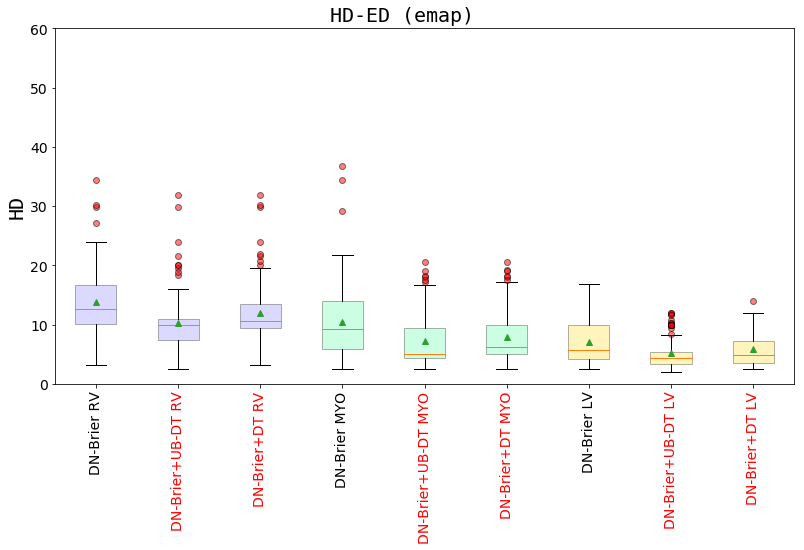

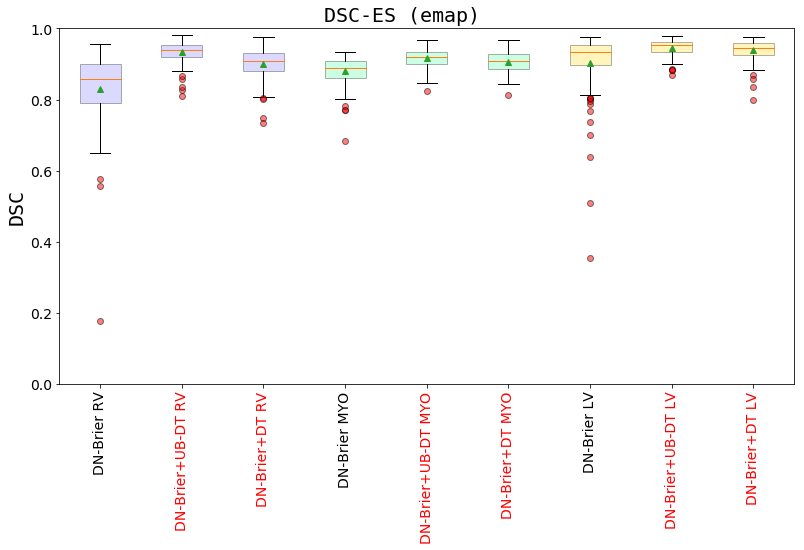

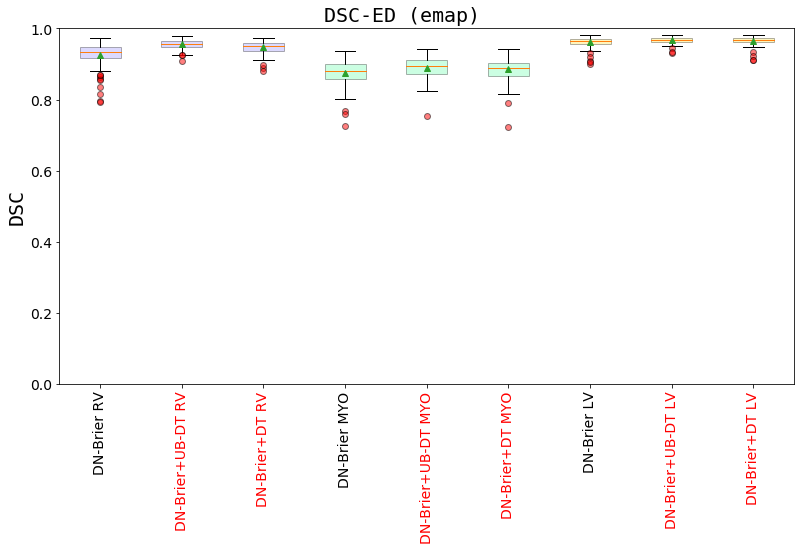

WARNING - Loading results from /home/jorg/expers/acdc/dcnn_mc_brier/sim_results/bmap/sim_expert_base_fall_n200.npz
WARNING - Loading results from /home/jorg/expers/acdc/dcnn_mc_brier/sim_results/bmap/sim_expert_allerrors_fixed_46_31_fall_n200.npz
WARNING - Loading results from /home/jorg/expers/acdc/dcnn_mc_brier/sim_results/bmap/sim_expert_fixed_46_31_bmap_fall_n200.npz
WARNING - Loading results from /home/jorg/expers/acdc/dcnn_mc_brier/sim_results/bmap/sim_expert_base_fall_n200.npz
WARNING - Loading results from /home/jorg/expers/acdc/dcnn_mc_brier/sim_results/bmap/sim_expert_allerrors_fixed_46_31_fall_n200.npz
WARNING - Loading results from /home/jorg/expers/acdc/dcnn_mc_brier/sim_results/bmap/sim_expert_fixed_46_31_bmap_fall_n200.npz


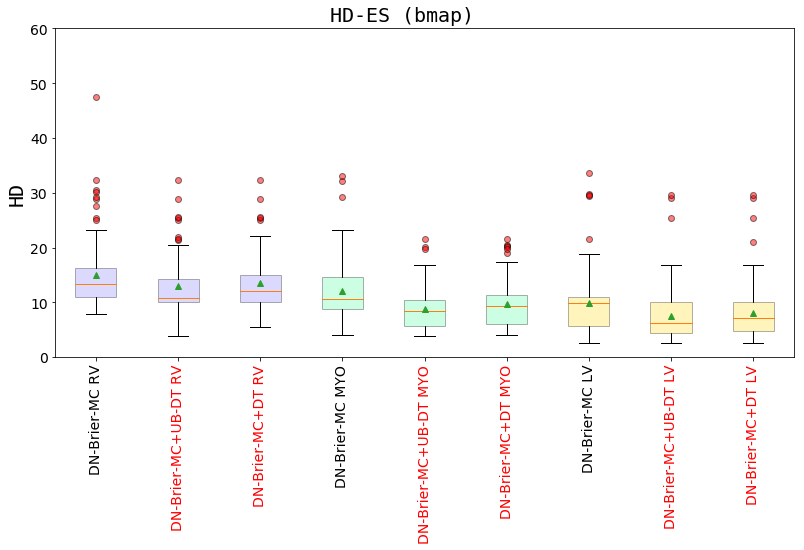

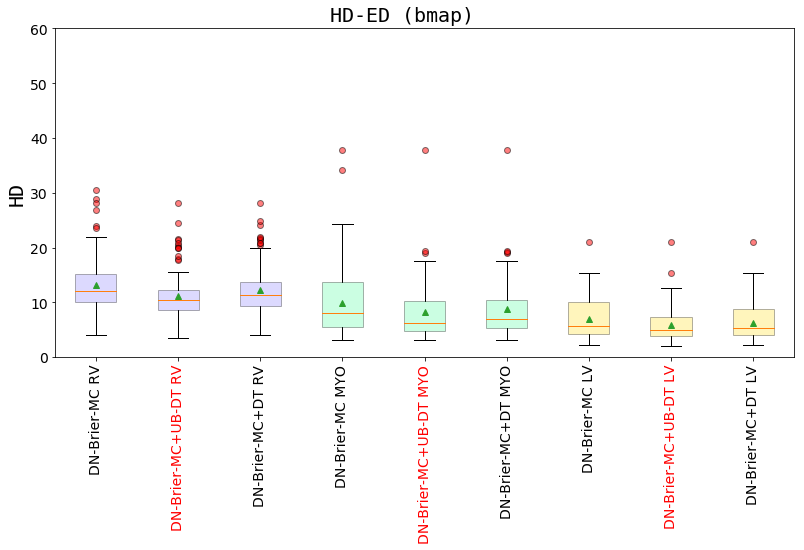

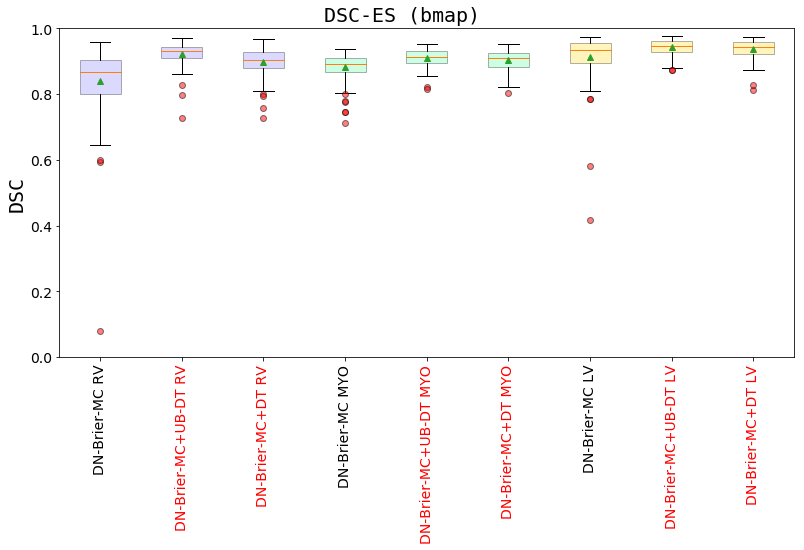

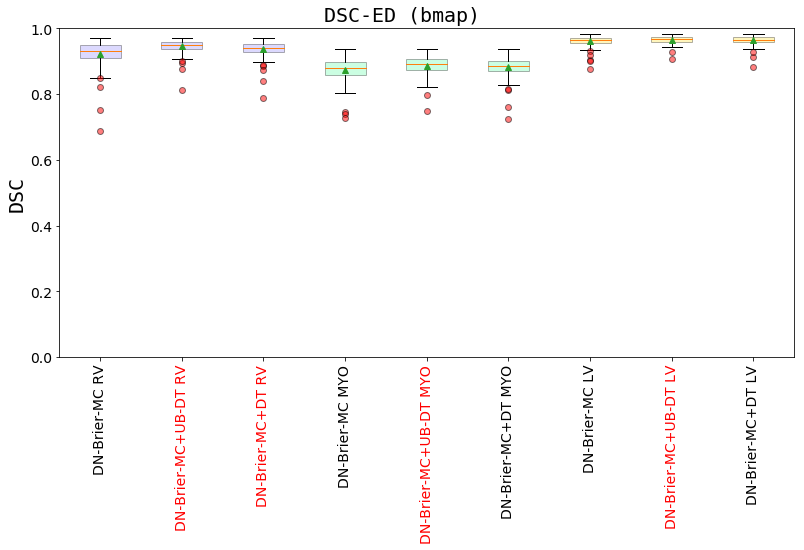

WARNING - Loading results from /home/jorg/expers/acdc/dcnn_mc_dice/sim_results/emap/sim_expert_base_fall_n200.npz
WARNING - Loading results from /home/jorg/expers/acdc/dcnn_mc_dice/sim_results/emap/sim_expert_allerrors_fixed_46_31_fall_n200.npz
WARNING - Loading results from /home/jorg/expers/acdc/dcnn_mc_dice/sim_results/emap/sim_expert_fixed_46_31_emap_fall_n200.npz
WARNING - Loading results from /home/jorg/expers/acdc/dcnn_mc_dice/sim_results/emap/sim_expert_base_fall_n200.npz
WARNING - Loading results from /home/jorg/expers/acdc/dcnn_mc_dice/sim_results/emap/sim_expert_allerrors_fixed_46_31_fall_n200.npz
WARNING - Loading results from /home/jorg/expers/acdc/dcnn_mc_dice/sim_results/emap/sim_expert_fixed_46_31_emap_fall_n200.npz


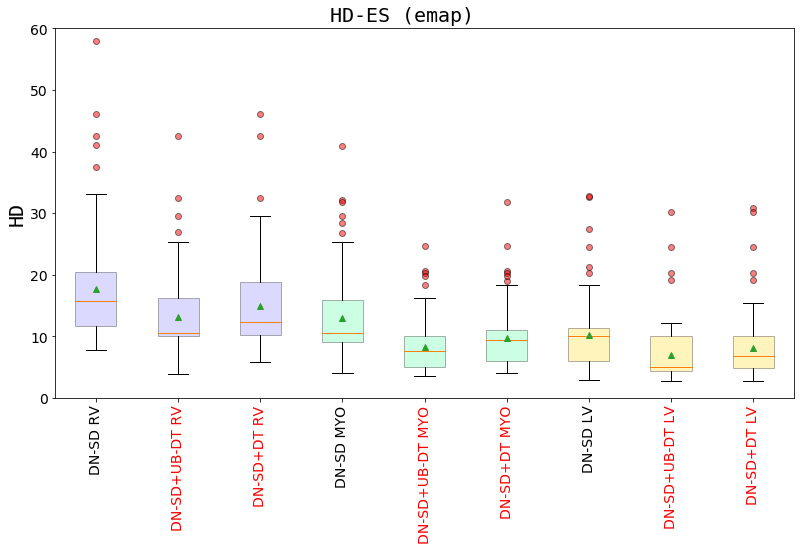

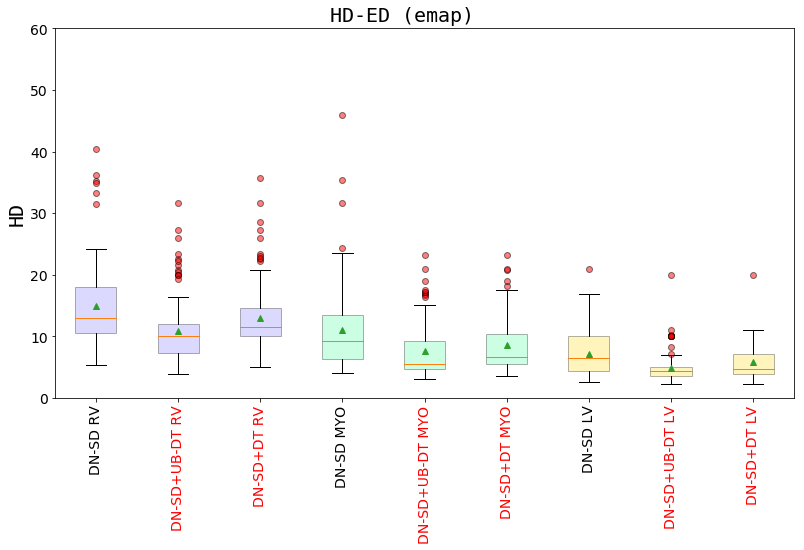

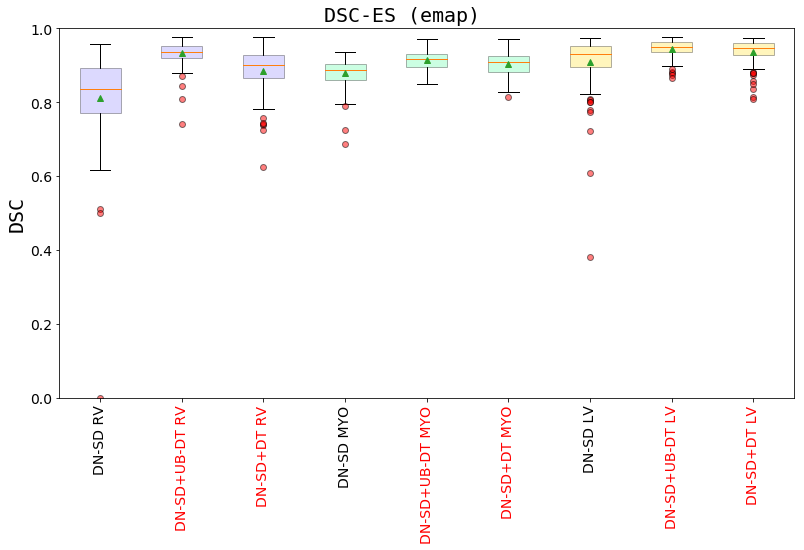

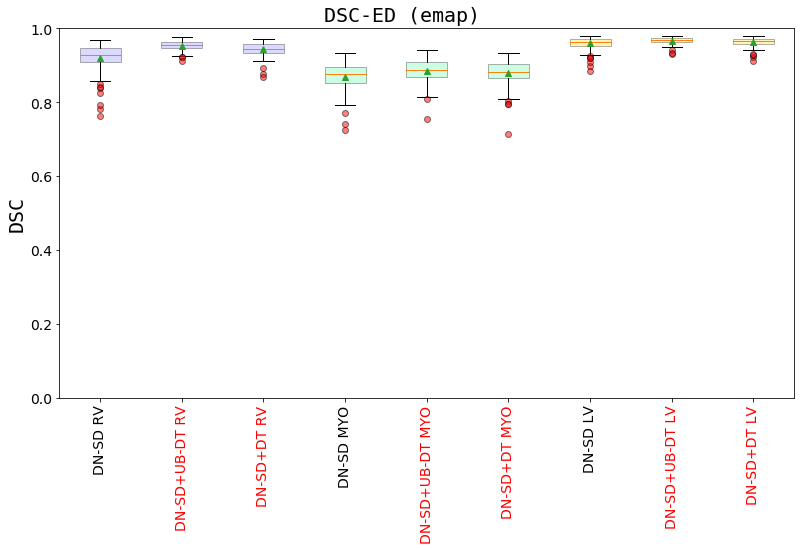

WARNING - Loading results from /home/jorg/expers/acdc/dcnn_mc_dice/sim_results/bmap/sim_expert_base_fall_n200.npz
WARNING - Loading results from /home/jorg/expers/acdc/dcnn_mc_dice/sim_results/bmap/sim_expert_allerrors_fixed_46_31_fall_n200.npz
WARNING - Loading results from /home/jorg/expers/acdc/dcnn_mc_dice/sim_results/bmap/sim_expert_fixed_46_31_bmap_fall_n200.npz
WARNING - Loading results from /home/jorg/expers/acdc/dcnn_mc_dice/sim_results/bmap/sim_expert_base_fall_n200.npz
WARNING - Loading results from /home/jorg/expers/acdc/dcnn_mc_dice/sim_results/bmap/sim_expert_allerrors_fixed_46_31_fall_n200.npz
WARNING - Loading results from /home/jorg/expers/acdc/dcnn_mc_dice/sim_results/bmap/sim_expert_fixed_46_31_bmap_fall_n200.npz


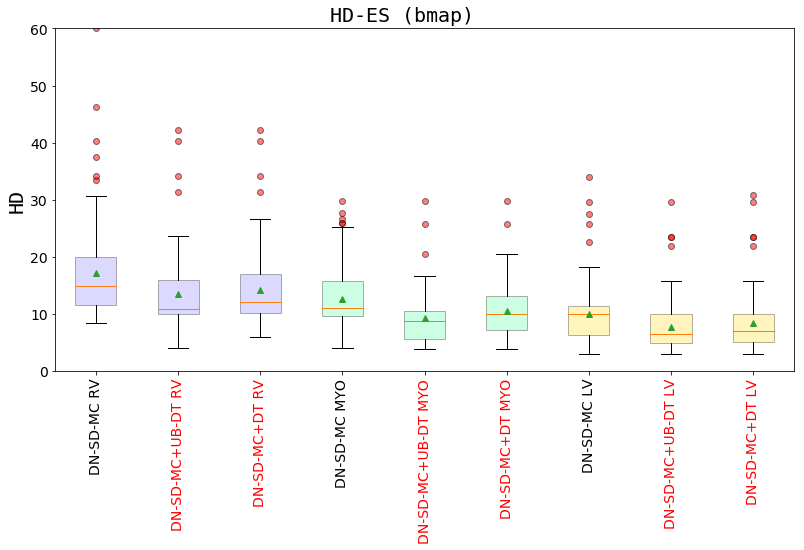

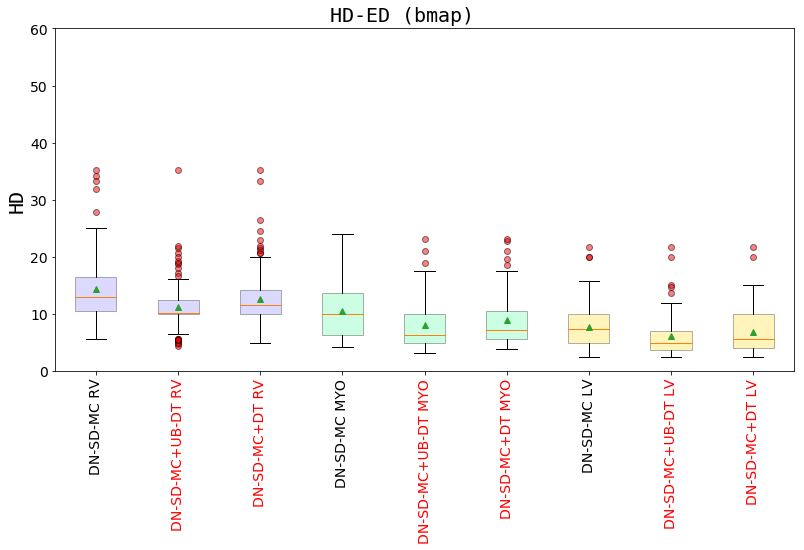

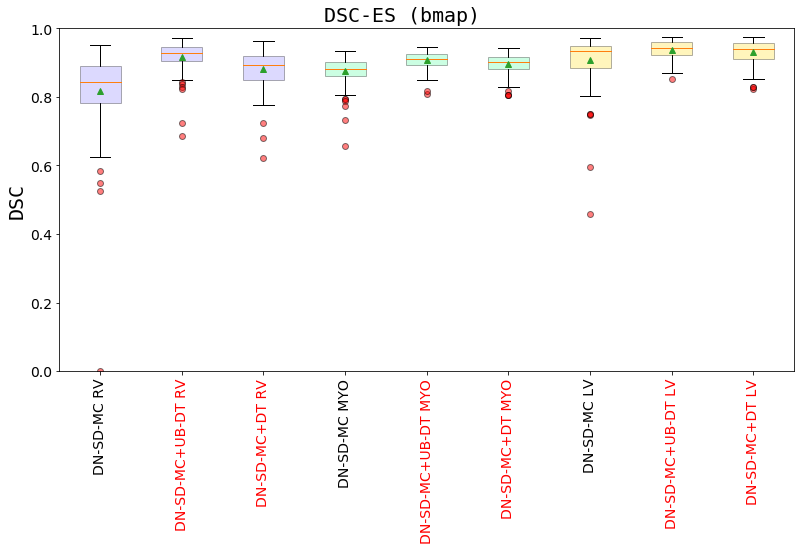

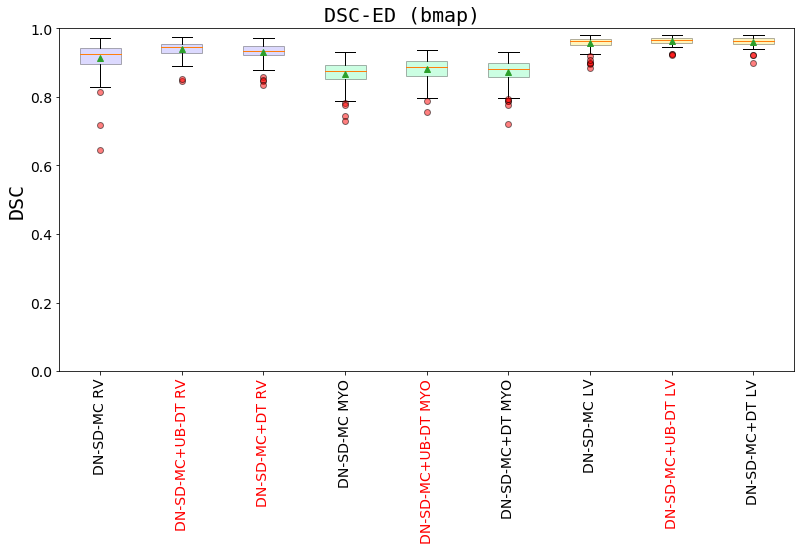

In [32]:
dt_config_id = "fixed_46_31"
umaps = ['emap', 'bmap']
p_threshold = 0.05

seg_model = "dcnn_mc"
if seg_model == "dcnn_mc":
    loss_functions = ["brier", "dice"]
else:
    loss_functions = ["ce", "dice"]

do_save = False

for loss_function in loss_functions:
    for input_channels in umaps:

        model_tag = seg_model + "_" + loss_function
        input_root_dir = os.path.expanduser("~/expers/acdc/" + model_tag + "/sim_results/" + input_channels)
        fig_output_dir = os.path.join(input_root_dir, "figures")

        str_fold = "_fall_"

        fname_base = os.path.join(input_root_dir, "sim_expert_base" + str_fold + "n200.npz")
        fname_correct_all = os.path.join(input_root_dir, "sim_expert_allerrors_" + dt_config_id + str_fold + "n200.npz")
        fname_seg_dt = os.path.join(input_root_dir, "sim_expert_" + dt_config_id + "_" + input_channels + \
                                          str_fold + "n200.npz")
        # fname_all_mri_labels = os.path.join(input_root_dir, "model_" + dt_config_id + "_mri_labels_fold0_sim_expert_50.npz")
        # fname_all_mri_map = os.path.join(input_root_dir, "model_" + dt_config_id + "_mri_map_fold0_sim_expert_50.npz")

        result_base = SimulateExpert.load_results(fname_base, as_test_result=False)
        result_correct_all = SimulateExpert.load_results(fname_correct_all, as_test_result=False)
        result_seg_dt = SimulateExpert.load_results(fname_seg_dt, as_test_result=False)
        result_base_tr = SimulateExpert.load_results(fname_base, as_test_result=True)
        result_base_tr.network = model_tag
        result_correct_all_tr = SimulateExpert.load_results(fname_correct_all, as_test_result=True)
        result_correct_all_tr.network = model_tag
        result_seg_dt_tr = SimulateExpert.load_results(fname_seg_dt, as_test_result=True)
        result_seg_dt_tr.network = model_tag

        generate_box_plots(result_base_tr, result_correct_all_tr, result_seg_dt_tr, 
                               result_base, result_correct_all, result_seg_dt, 
                               input_channels, model_tag, do_save=do_save, p_threshold=p_threshold)

## Generate box plots for ALL folds for specific model - input channel - umap

INFO - Successfully saved fig /home/jorg/expers/acdc/dcnn_mc_brier/sim_results/bmap/figures/bmap_dcnn_mc_brier_HD_ES_box_plot.pdf
INFO - Successfully saved fig /home/jorg/expers/acdc/dcnn_mc_brier/sim_results/bmap/figures/bmap_dcnn_mc_brier_HD_ED_box_plot.pdf


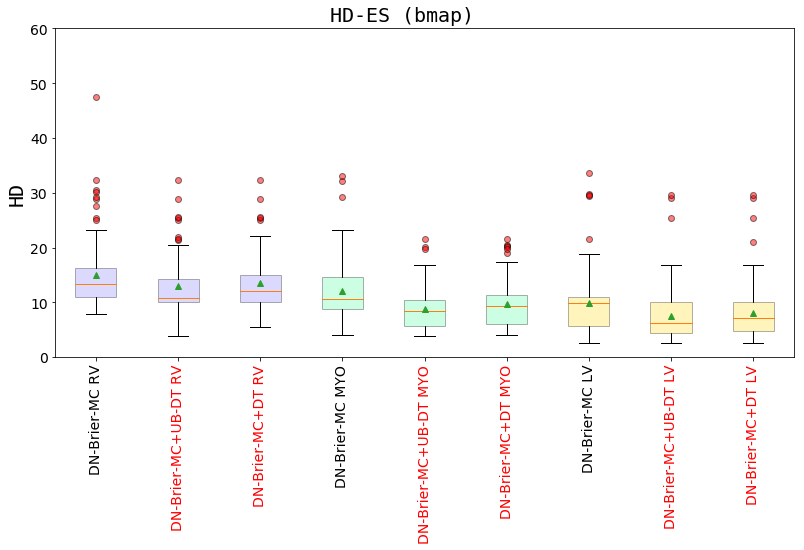

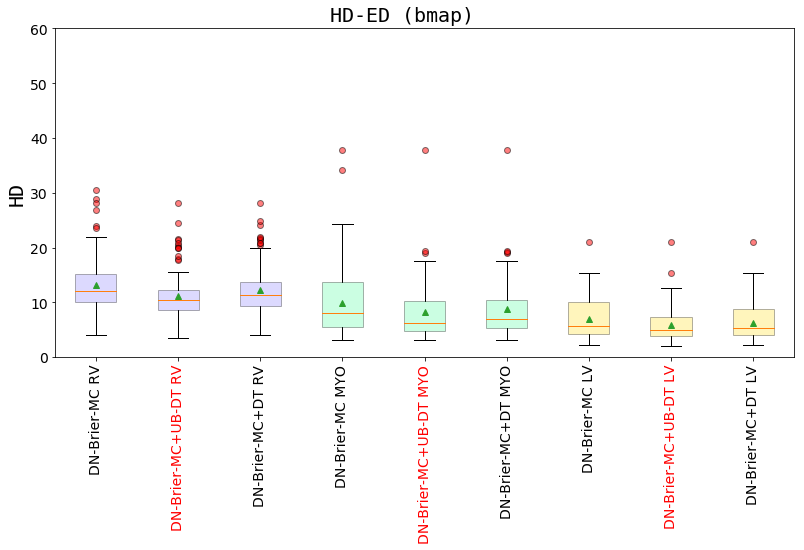

INFO - Successfully saved fig /home/jorg/expers/acdc/dcnn_mc_brier/sim_results/bmap/figures/bmap_dcnn_mc_brier_DSC_ES_box_plot.pdf
INFO - Successfully saved fig /home/jorg/expers/acdc/dcnn_mc_brier/sim_results/bmap/figures/bmap_dcnn_mc_brier_DSC_ED_box_plot.pdf


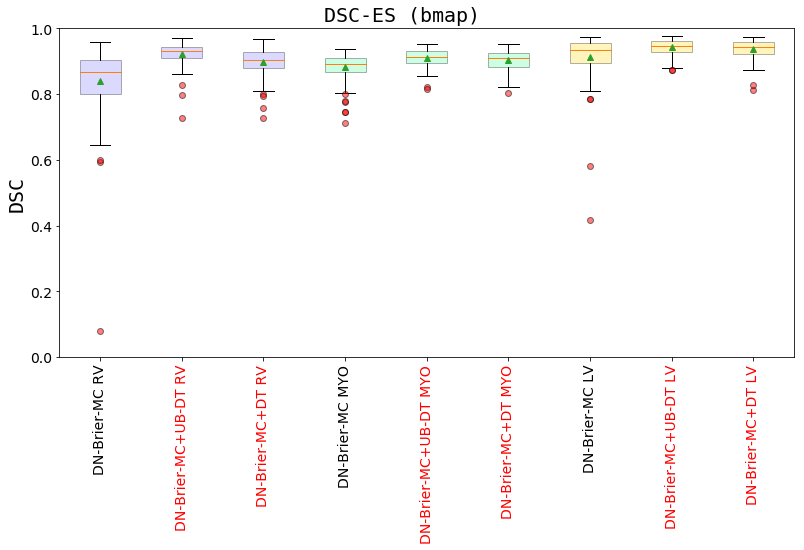

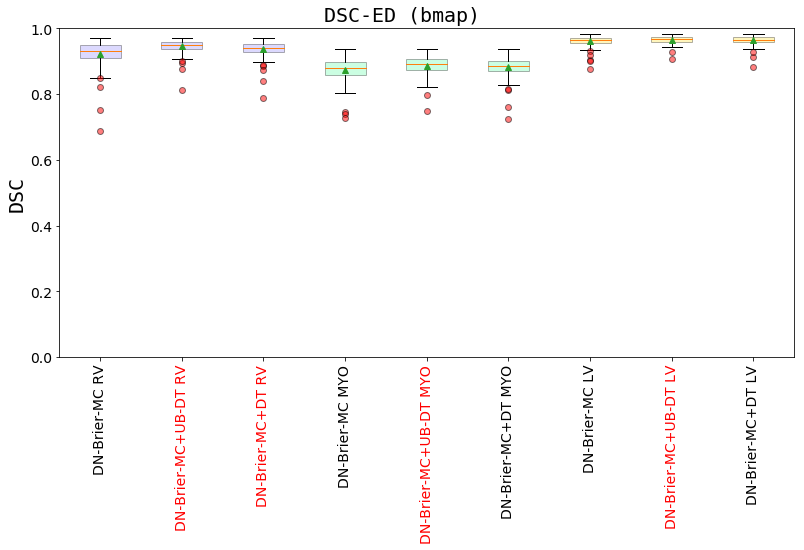

In [23]:
p_threshold = 0.05

generate_box_plots(result_base_tr, result_correct_all_tr, result_seg_dt_tr, 
                       result_base, result_correct_all, result_seg_dt, 
                       input_channels, model_tag, do_save=True, p_threshold=p_threshold)

# Load results for a specifc fold / detection run

In [ ]:
dt_config_id = "fixed_46_31"

model_dir = model_dirs[seg_model][input_channels]

input_root_dir = os.path.expanduser("~/expers/acdc/" +seg_model+ "/dt_logs/" + model_dir)
input_root_dir = os.path.join(input_root_dir, "sim_results")
fig_output_dir = os.path.join(input_root_dir, "figures")

str_fold = "_f" + str(model_settings.fold) + "_"

fname_base = os.path.join(input_root_dir, "sim_expert_base" + str_fold + "n50.npz")
fname_correct_all = os.path.join(input_root_dir, "sim_expert_allerrors_" + dt_config_id + str_fold + "n50.npz")
fname_all_channels = os.path.join(input_root_dir, "sim_expert_" + dt_config_id + "_" + input_channels + str_fold + "n50.npz")
# fname_all_mri_labels = os.path.join(input_root_dir, "model_" + dt_config_id + "_mri_labels_fold0_sim_expert_50.npz")
# fname_all_mri_map = os.path.join(input_root_dir, "model_" + dt_config_id + "_mri_map_fold0_sim_expert_50.npz")

result_base = SimulateExpert.load_results(fname_base, as_test_result=False)
result_correct_all = SimulateExpert.load_results(fname_correct_all, as_test_result=False)
result_all_channels = SimulateExpert.load_results(fname_all_channels, as_test_result=False)
result_base_tr = SimulateExpert.load_results(fname_base, as_test_result=True)
result_base_tr.network = seg_model
result_correct_all_tr = SimulateExpert.load_results(fname_correct_all, as_test_result=True)
result_correct_all_tr.network = seg_model
result_all_channels_tr = SimulateExpert.load_results(fname_all_channels, as_test_result=True)
result_all_channels_tr.network = seg_model

In [22]:
from eval_detection.helpers import compute_p_values

perf_type="DSC"

# returns a dict ('ES', 'ED') where each dict contains a numpy array [4, #patients] 4=nclasses
p_values_baseline = compute_p_values(result_base, result_correct_all, perf_type)  # result_all_channels result_correct_all

print("--------------- Baseline {} -------------------- ".format(perf_type))
print("p-values {}: RV {:.5f} Myo {:.5f} LV {:.5f}".format('ED', p_values_baseline['ED'][1], 
                                                           p_values_baseline['ED'][2],
                                                           p_values_baseline['ED'][3]))

print("p-values {}: RV {:.6f} Myo {:.6f} LV {:.6f}".format('ES', p_values_baseline['ES'][1], 
                                                           p_values_baseline['ES'][2],
                                                           p_values_baseline['ES'][3]))
print("--------------- With detection {} --------------- ".format(perf_type))
p_values_seg_dt = compute_p_values(result_base, result_all_channels, perf_type)
print("p-values {}: RV {:.5f} Myo {:.5f} LV {:.5f}".format('ED', p_values_seg_dt['ED'][1], 
                                                           p_values_seg_dt['ED'][2],
                                                           p_values_seg_dt['ED'][3]))

print("p-values {}: RV {:.6f} Myo {:.6f} LV {:.6f}".format('ES', p_values_seg_dt['ES'][1], 
                                                           p_values_seg_dt['ES'][2],
                                                           p_values_seg_dt['ES'][3]))

--------------- Baseline DSC -------------------- 
p-values ED: RV 0.00015 Myo 0.01382 LV 0.01849
p-values ES: RV 0.000014 Myo 0.007647 LV 0.015249
--------------- With detection DSC --------------- 
p-values ED: RV 0.00850 Myo 0.03335 LV 0.09512
p-values ES: RV 0.001592 Myo 0.100169 LV 0.120184


## Load results as **non-TestResult** object and **TestResult**

- Non TestResult object is used for p-value calculation
- TestResult object is used for BoxPlots, Detection histograms

In [29]:
from plotting.detection_box_plots import make_volume_box_plots
from eval_detection.helpers import compute_p_values
from utils.common import translate_combined_model_tag

def generate_box_plots(result_base_tr, result_correct_all_tr, result_seg_dt_tr, 
                       result_base, result_correct_all, result_seg_dt, 
                       input_channels, model_tag, do_save=True, p_threshold=0.05):
    
    def create_xlabel_mask(p_values_base, p_values_result, p_threshold):
        x_label_mask = {'ED': np.zeros(3 * len(list_of_labels)).astype(np.bool), 
                        'ES': np.zeros(3 * len(list_of_labels)).astype(np.bool)}
        for c_phase, p_values in p_values_base.items():
            # p_values is numpy array size 4
            mask_seg_dt = p_values[1:] < p_threshold
            mask_results = p_values_result[c_phase][1:] <= p_threshold
            # print(c_phase, p_values_result[c_phase][1:], mask_results)
            for i, m in enumerate(mask_seg_dt):
                s = i * 3
                x_label_mask[c_phase][1+s] = mask_seg_dt[i]
                x_label_mask[c_phase][2+s] = mask_results[i]
        return x_label_mask

    perf_types = ["HD", "DSC"]  # HD DSC
    file_suffix = input_channels + "_" + model_tag
    
    model = translate_combined_model_tag(model_tag)
    model_suffix = "-MC" if input_channels == "bmap" else ""
    model += model_suffix
    list_of_labels = [model, model+"+UB-DT", model+"+DT"]


    # this is our baseline, the performance of the segmentation model BEFORE detection
    dice_base_seg, hd_base_seg = result_base_tr.get_boxplot_vectors()
    # this is our benchmark, if we would have detected ALL seg-errors for this model
    dice_base_seg_dt, hd_base_seg_dt = result_correct_all_tr.get_boxplot_vectors()
    # these are the result using the detection
    dice_seg_dt, hd_seg_dt = result_seg_dt_tr.get_boxplot_vectors()

    for perf_type in perf_types:
        if perf_type == "DSC":
            list_of_vectors = [dice_base_seg, dice_base_seg_dt, dice_seg_dt]

        elif perf_type == "HD":
            list_of_vectors = [hd_base_seg, hd_base_seg_dt, hd_seg_dt]

        # returns dictionary with keys ED/ES and numpy array of size 4 for bg, rv, myo, lv class
        # we use the p-values to "color" the specific x-labels in red if p-value is below or equal to 0.05
        p_values_base_seg_dt = compute_p_values(result_base, result_correct_all, perf_type) 
        p_values_allchannels = compute_p_values(result_base, result_seg_dt, perf_type)
        # returns dictionary with keys ED/ES and numpy array of size 9 which follows x-label logic from box-plot
        # we use this boolean mask to color the x-labels, indicating which one is statistically significant
        x_label_mask = create_xlabel_mask(p_values_base_seg_dt, p_values_allchannels, p_threshold)

        make_volume_box_plots(list_of_vectors, list_of_labels, do_show=True, do_save=do_save, perf_type=perf_type,
                                      output_dir=fig_output_dir, height=8, width=12, file_suffix=file_suffix, 
                                      type_of_map=input_channels, x_label_mask=x_label_mask, model_tag=model_tag)

# Plot DSC or HD per patient and model to analyze/identify outliers

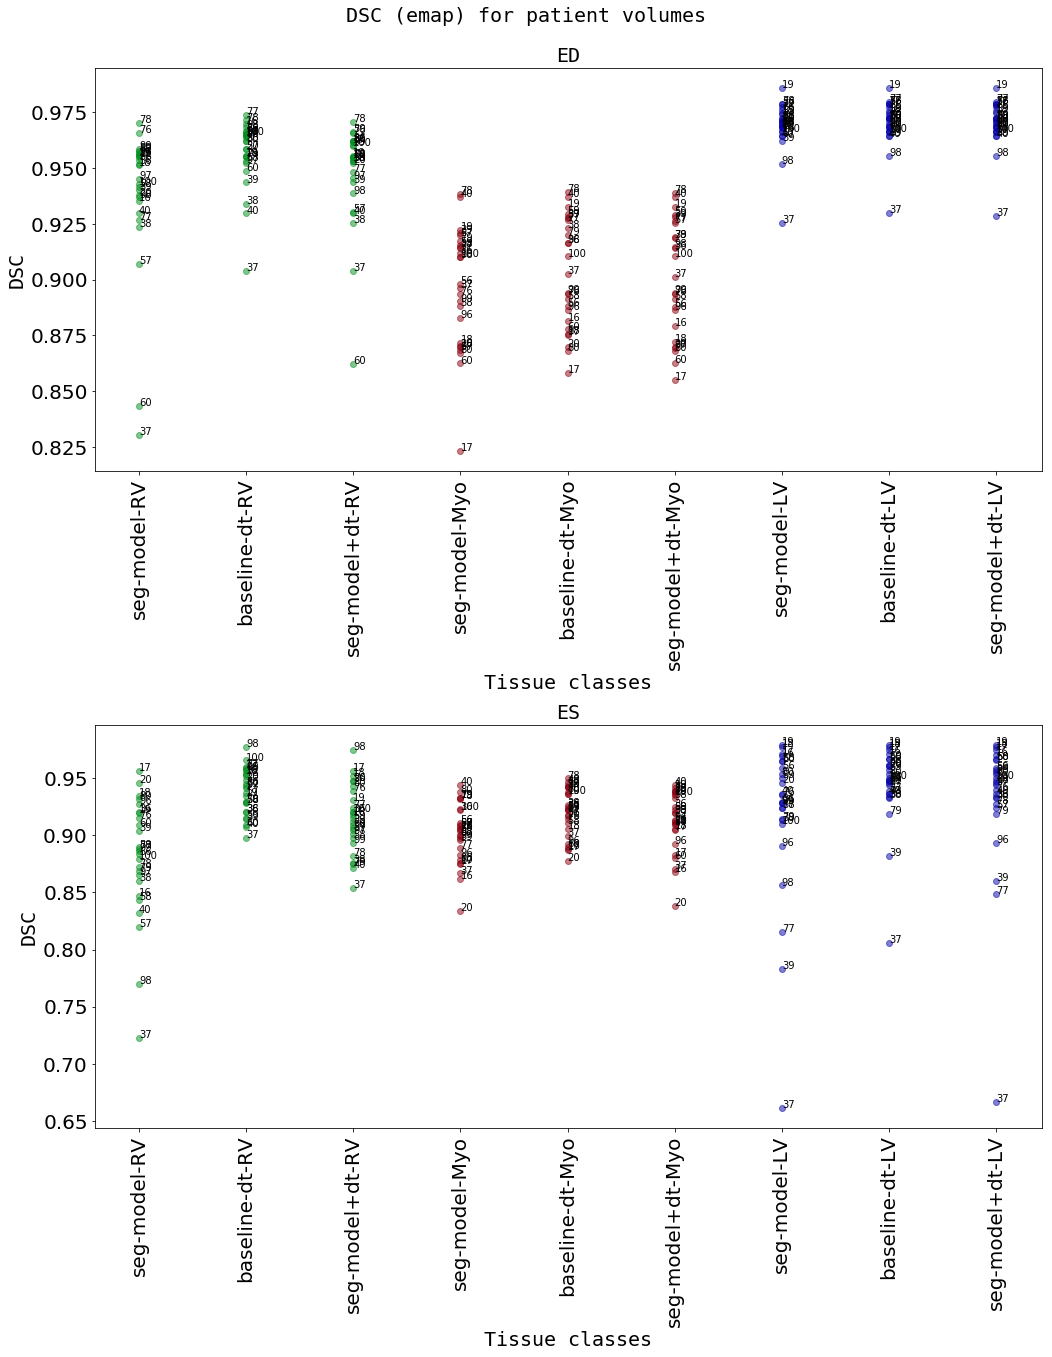

In [10]:
from plotting.detection_box_plots import plot_volume_hist

do_save = False
perf_type = "DSC"
list_of_labels = ["seg-model", "baseline-dt", "seg-model+dt"]
file_suffix = input_channels + "_" + seg_model + "_" + type_of_map

result_objects = [result_base, result_correct_all, result_all_channels]
pat_frame_ids = result_all_channels["pat_frame_ids"]
pat_ids = np.unique(pat_frame_ids[:, 0].astype(np.int))
plot_volume_hist(pat_frame_ids, result_objects, 
                         perf_type=perf_type, res_label=list_of_labels,
                         height=20, patient_ids=pat_ids, do_save=do_save, 
                         output_dir=fig_output_dir, file_prefix=file_suffix, type_of_map=type_of_map)

## Generate latex string for journal paper

In [75]:
from evaluate.test_results import format_result
from eval_detection.helpers import compute_p_values
from utils.common import translate_combined_model_tag

str_fold = "_fall_"
dt_config_id = "fixed_46_31"
mc_dropout = True
src_path = "~/expers/acdc/unet_mc_dice"
model = translate_combined_model_tag(src_path.split(os.sep)[-1])
print(model)
u_map = "bmap" if mc_dropout else "emap"
src_path = os.path.expanduser(os.path.join(src_path, "sim_results" + os.sep + u_map))

fname_base = os.path.join(src_path, "sim_expert_base" + str_fold + "n200.npz")
fname_det_base = os.path.join(src_path, "sim_expert_allerrors_" + dt_config_id + str_fold + "n200.npz")
fname_detection = os.path.join(src_path, "sim_expert_" + dt_config_id + "_" + u_map + \
                                          str_fold + "n200.npz")
        
result_base = SimulateExpert.load_results(fname_base, as_test_result=False)
result_det_base = SimulateExpert.load_results(fname_det_base, as_test_result=False)
result_detection = SimulateExpert.load_results(fname_detection, as_test_result=False)

perf_types = ['HD', 'DSC']
p_values_det_base = {'DSC': None, 'HD': None}
p_values_detection = {'DSC': None, 'HD': None}
for perf_type in perf_types:
    p_values_det_base[perf_type] = compute_p_values(result_base, result_det_base, perf_type) 
    p_values_detection[perf_type] = compute_p_values(result_base, result_detection, perf_type)

latex_string_base = format_result(result_base, 
                                      model_name=model,
                                      p_values=None)
model_tag = model + "+MC+UB+DT" if mc_dropout else model + "+UB+DT"
latex_string_det_base = format_result(result_det_base, 
                                      model_name=model_tag,
                                      p_values=p_values_det_base)
model_tag = model + "+MC+DT" if mc_dropout else model + "+DT"
latex_string_detection = format_result(result_detection, model_name=model_tag,
                                       p_values=p_values_detection)

print(latex_string_base + " \\\\")
print(latex_string_det_base + " \\\\")
print(latex_string_detection + " \\\\")

U-net-SD
WARNING - Loading results from /home/jorg/expers/acdc/unet_mc_dice/sim_results/bmap/sim_expert_base_fall_n200.npz
WARNING - Loading results from /home/jorg/expers/acdc/unet_mc_dice/sim_results/bmap/sim_expert_allerrors_fixed_46_31_fall_n200.npz
WARNING - Loading results from /home/jorg/expers/acdc/unet_mc_dice/sim_results/bmap/sim_expert_fixed_46_31_bmap_fall_n200.npz
\textbf{U-net-SD} & 0.966 (0.02) & 6.2 (3.9) & 0.929 (0.05) & 13.9 (7.9) & 0.889 (0.04) &  \multicolumn{1}{c|}{10.2 (8.4)} & \multicolumn{1}{|c}{0.917 (0.08)} & 8.9 (7.0) & 0.847 (0.09) & 16.0 (7.8) & 0.897 (0.03) & 12.1 (9.5) \\
\textbf{U-net-SD+MC+UB+DT} & 0.970* (0.01) & 4.6* (2.4) & 0.959* (0.01) & 9.8* (5.4) & 0.904* (0.03) &  \multicolumn{1}{c|}{8.0* (7.2)} & \multicolumn{1}{|c}{0.948* (0.03)} & 5.9* (4.2) & 0.935* (0.03) & 12.3* (7.5) & 0.923* (0.02) & 8.8* (7.5) \\
\textbf{U-net-SD+MC+DT} & 0.968 (0.01) & 5.2 (2.9) & 0.947* (0.03) & 11.6* (7.1) & 0.899* (0.03) &  \multicolumn{1}{c|}{8.3* (7.4)} & \multico

## Histogram of per patient TP detection

- make sure to adjust file_prefix to the correct label: all_channels, mri_labels, mri_map
- make sure to adjust result_obj to match the file_prefix that you're saving

INFO - Successfully saved fig /home/jorg/models/region_detector/rd1/results/e_map/fixed_42_28/figures/all_channels_tp_detection_hist.pdf


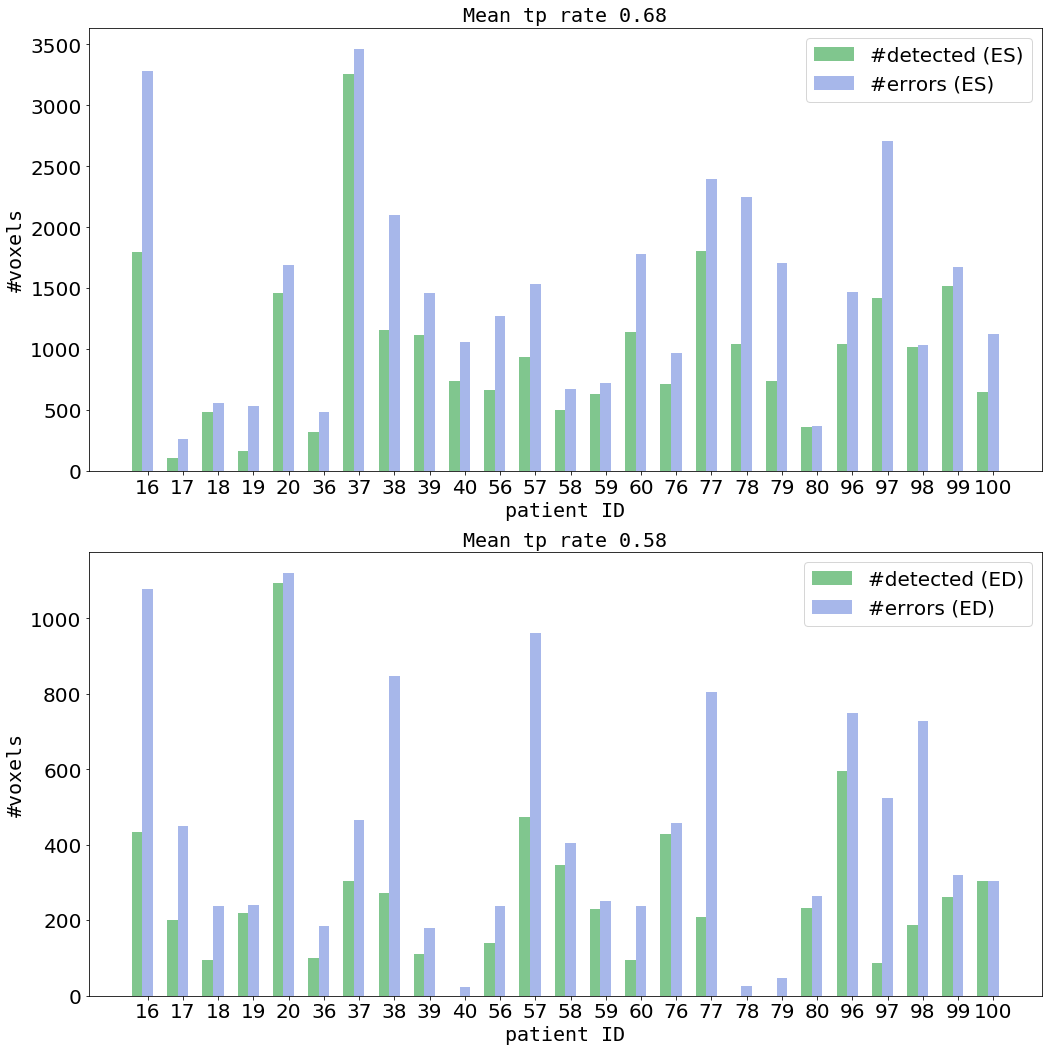

INFO - Successfully saved fig /home/jorg/models/region_detector/rd1/results/e_map/fixed_42_28/figures/mri_labels_tp_detection_hist.pdf


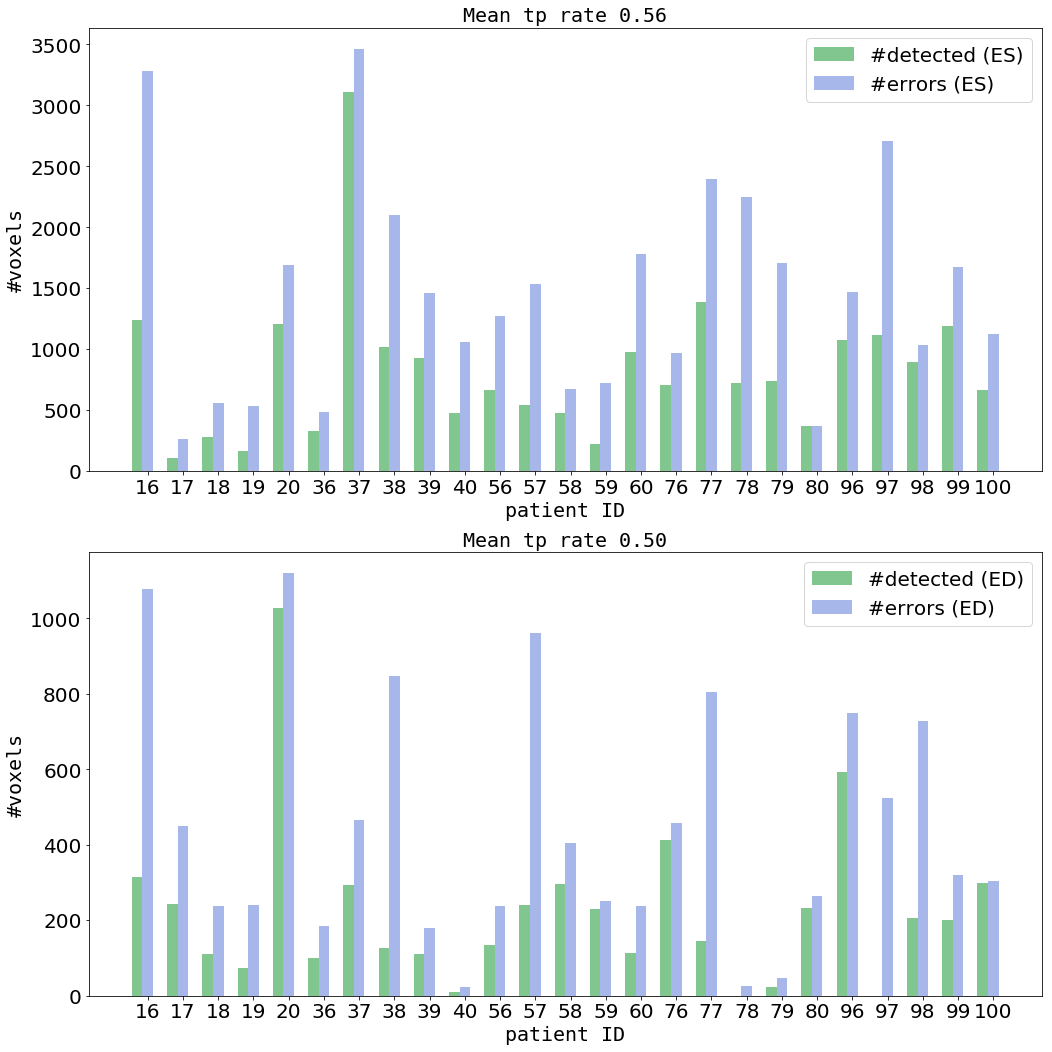

INFO - Successfully saved fig /home/jorg/models/region_detector/rd1/results/e_map/fixed_42_28/figures/mri_map_tp_detection_hist.pdf


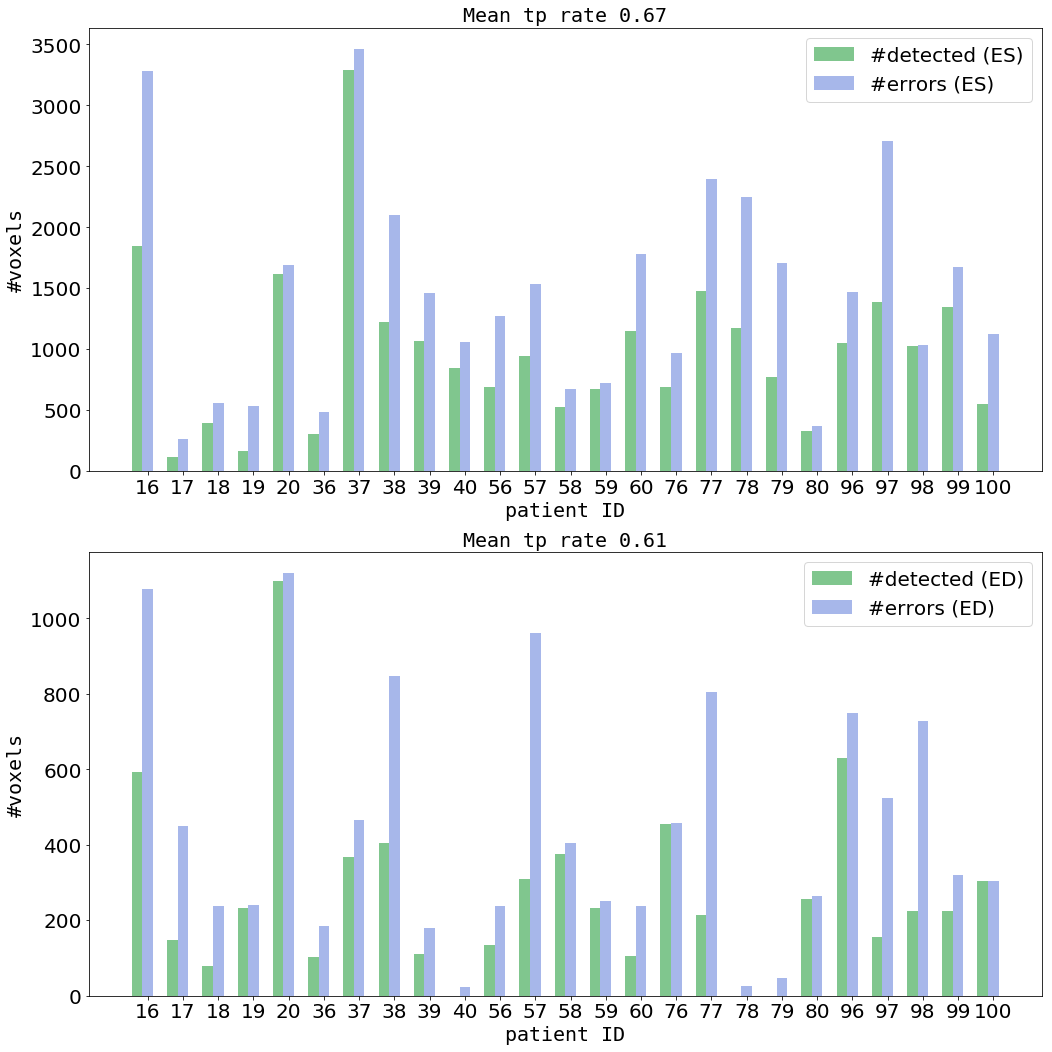

INFO - Successfully saved fig /home/jorg/models/region_detector/rd1/results/e_map/fixed_42_28/figures/ablation_all_channels_tp_detection_hist.pdf


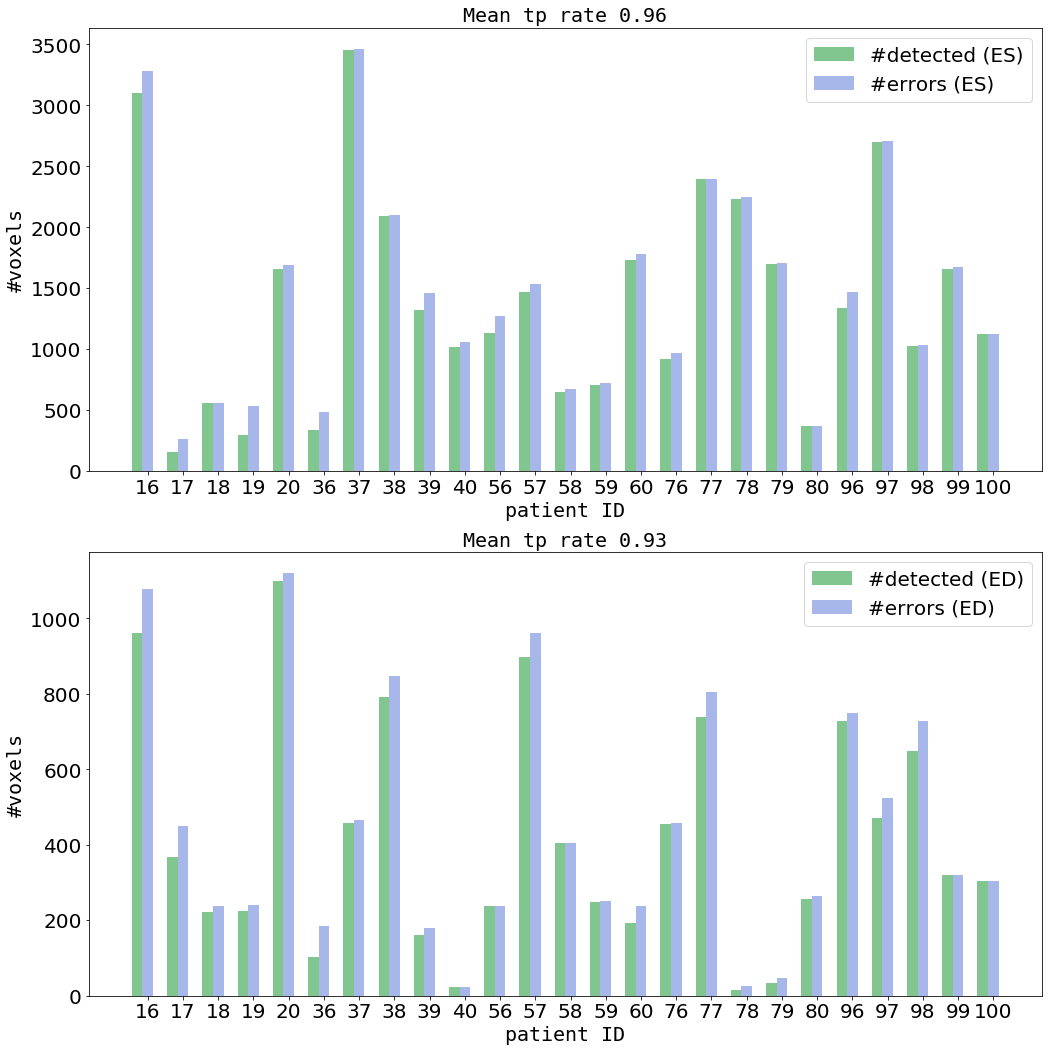

In [38]:
from plotting.detector.tp_detection_hist import plot_tp_detection_hist

file_prefix = "mri_labels"   #  
mymodels = ["all_channels", "mri_labels", "mri_map", "ablation_all_channels"]
do_save = True

for file_prefix in mymodels:
    if file_prefix == "mri_map":
        result_obj = result_mri_map
    elif file_prefix == "mri_labels":
        result_obj = result_mri_labels
    elif file_prefix == "all_channels":
        result_obj = result_all_channels
    elif file_prefix  == "ablation_all_channels":
        result_obj = result_ablation
    else:
        raise ValueError("{} is not a valid prefix".format(file_prefix))

    pat_ids = np.unique(result_obj['pat_frame_ids'][:, 0])
    plot_tp_detection_hist(result_obj['seg_error_det_es'], result_obj['seg_error_det_ed'], 
                           pat_ids, do_save=do_save, output_dir=fig_output_dir, 
                           height=16, file_prefix=file_prefix)

## Outlier analysis - plot metric (HD/DSC) per patient per tissue class

- Make sure to adjust the file_prefix to eval_run_id or "model_compare"
- Make sure to adjust **res_label** and **result_objects**
- **NOTE**, very similar to the below BoxPlots but we can follow here the patient volume
- **NOTE**, patient_ids must be a list of integers e.g. **[16, 20, 37]**, and if None then all IDs are plotted

INFO - Successfully saved fig /home/jorg/models/region_detector/rd1/results/e_map/fixed_42_28/figures/all_channels_DSC_pat_volumes.pdf


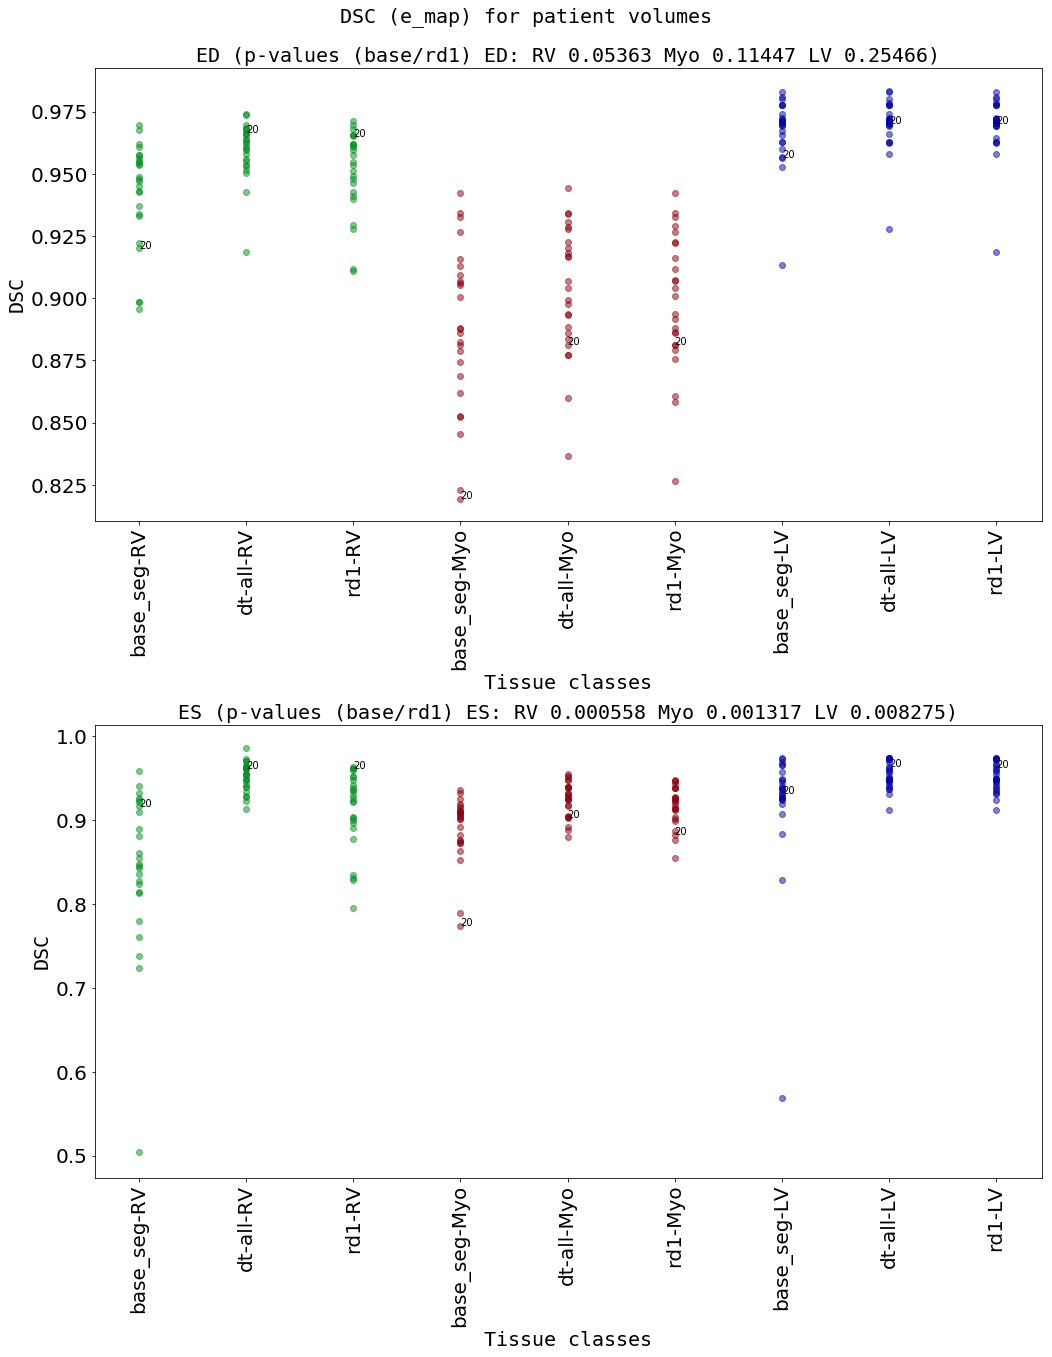

INFO - Successfully saved fig /home/jorg/models/region_detector/rd1/results/e_map/fixed_42_28/figures/all_channels_HD_pat_volumes.pdf


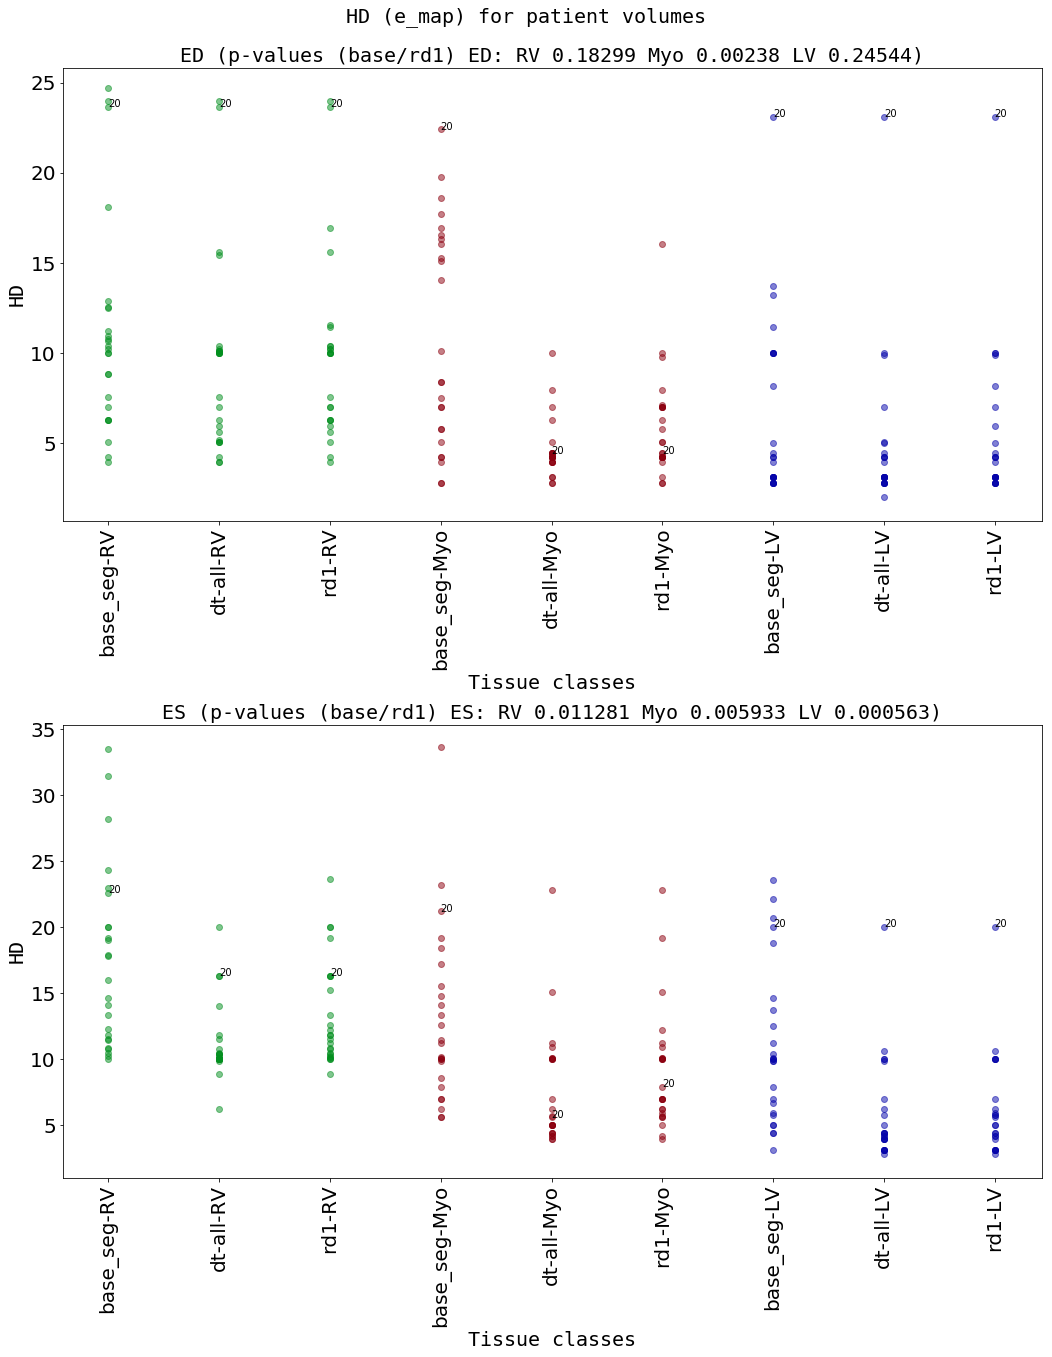

INFO - Successfully saved fig /home/jorg/models/region_detector/rd1/results/e_map/fixed_42_28/figures/mri_labels_DSC_pat_volumes.pdf


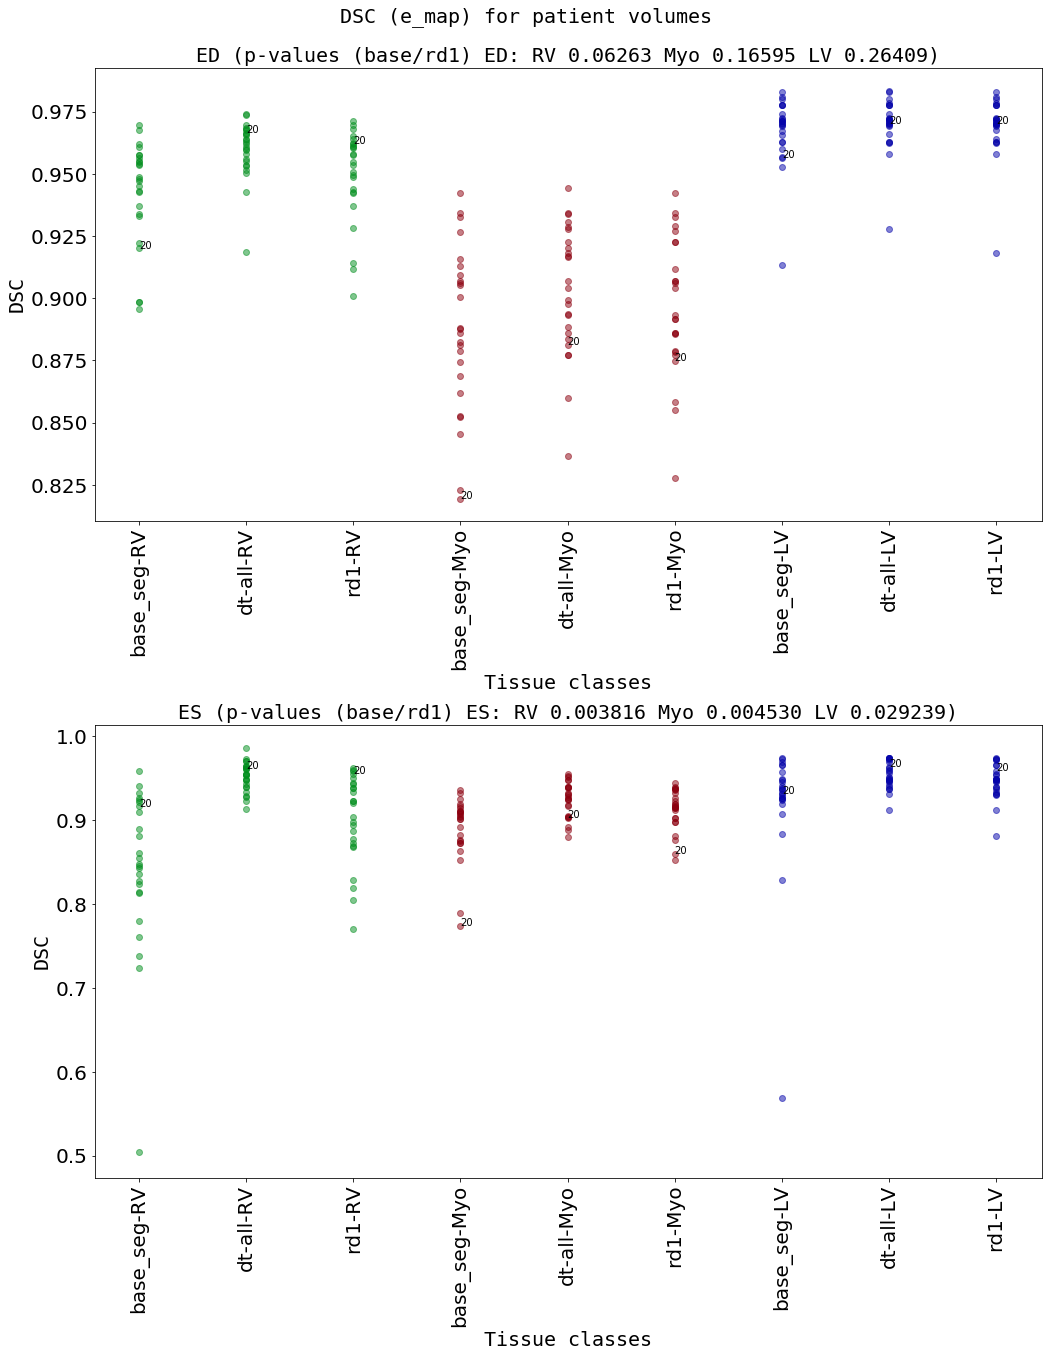

INFO - Successfully saved fig /home/jorg/models/region_detector/rd1/results/e_map/fixed_42_28/figures/mri_labels_HD_pat_volumes.pdf


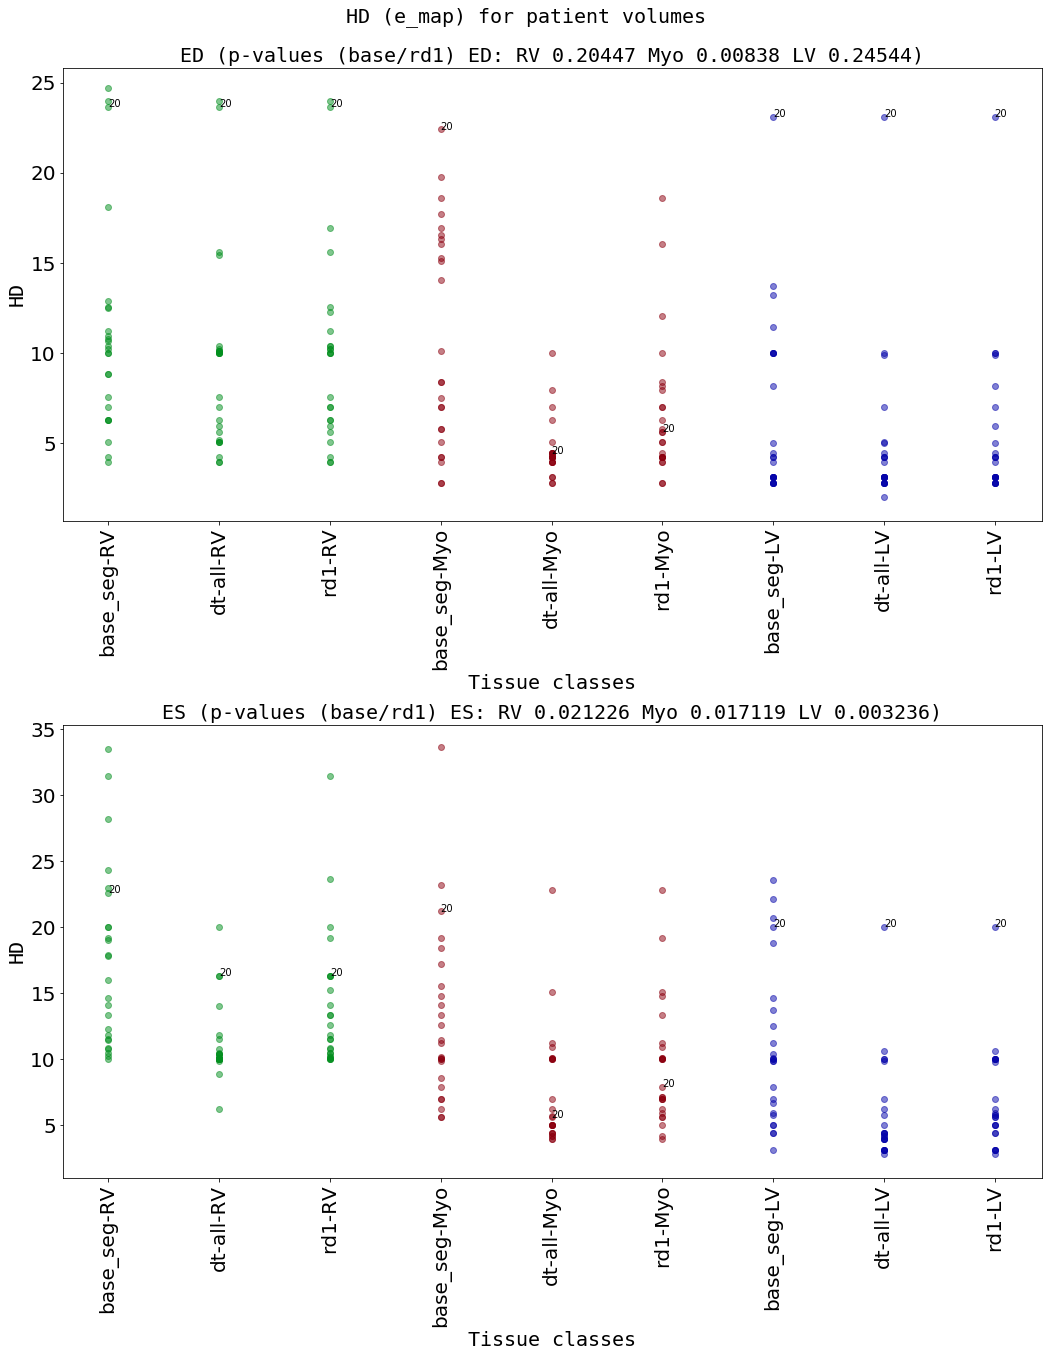

INFO - Successfully saved fig /home/jorg/models/region_detector/rd1/results/e_map/fixed_42_28/figures/mri_map_DSC_pat_volumes.pdf


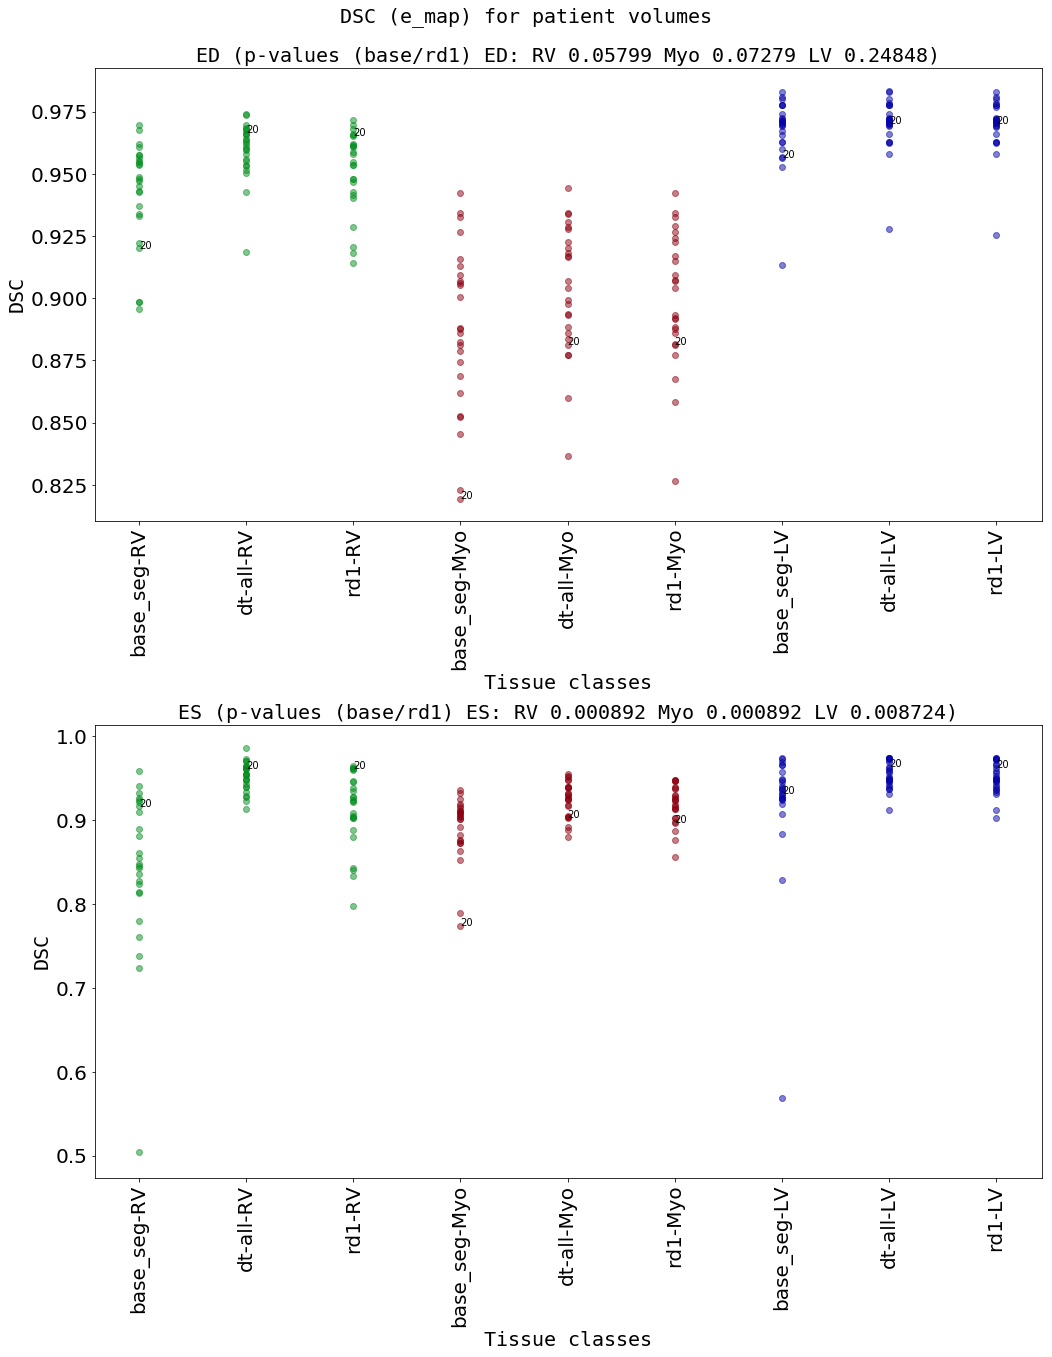

INFO - Successfully saved fig /home/jorg/models/region_detector/rd1/results/e_map/fixed_42_28/figures/mri_map_HD_pat_volumes.pdf


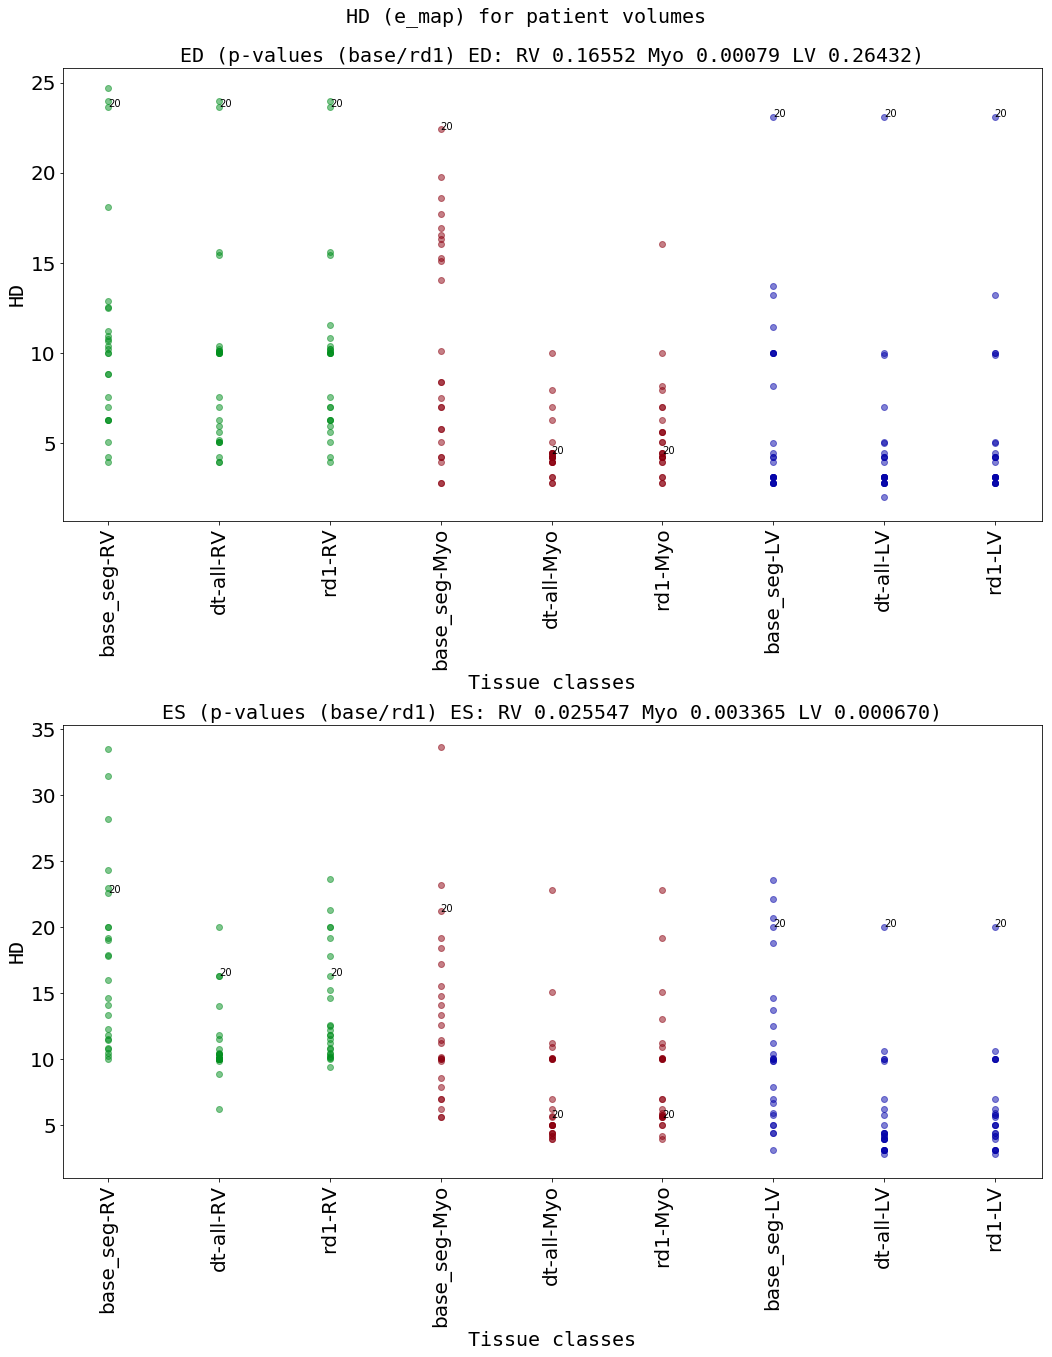

INFO - Successfully saved fig /home/jorg/models/region_detector/rd1/results/e_map/fixed_42_28/figures/model_compare_DSC_pat_volumes.pdf


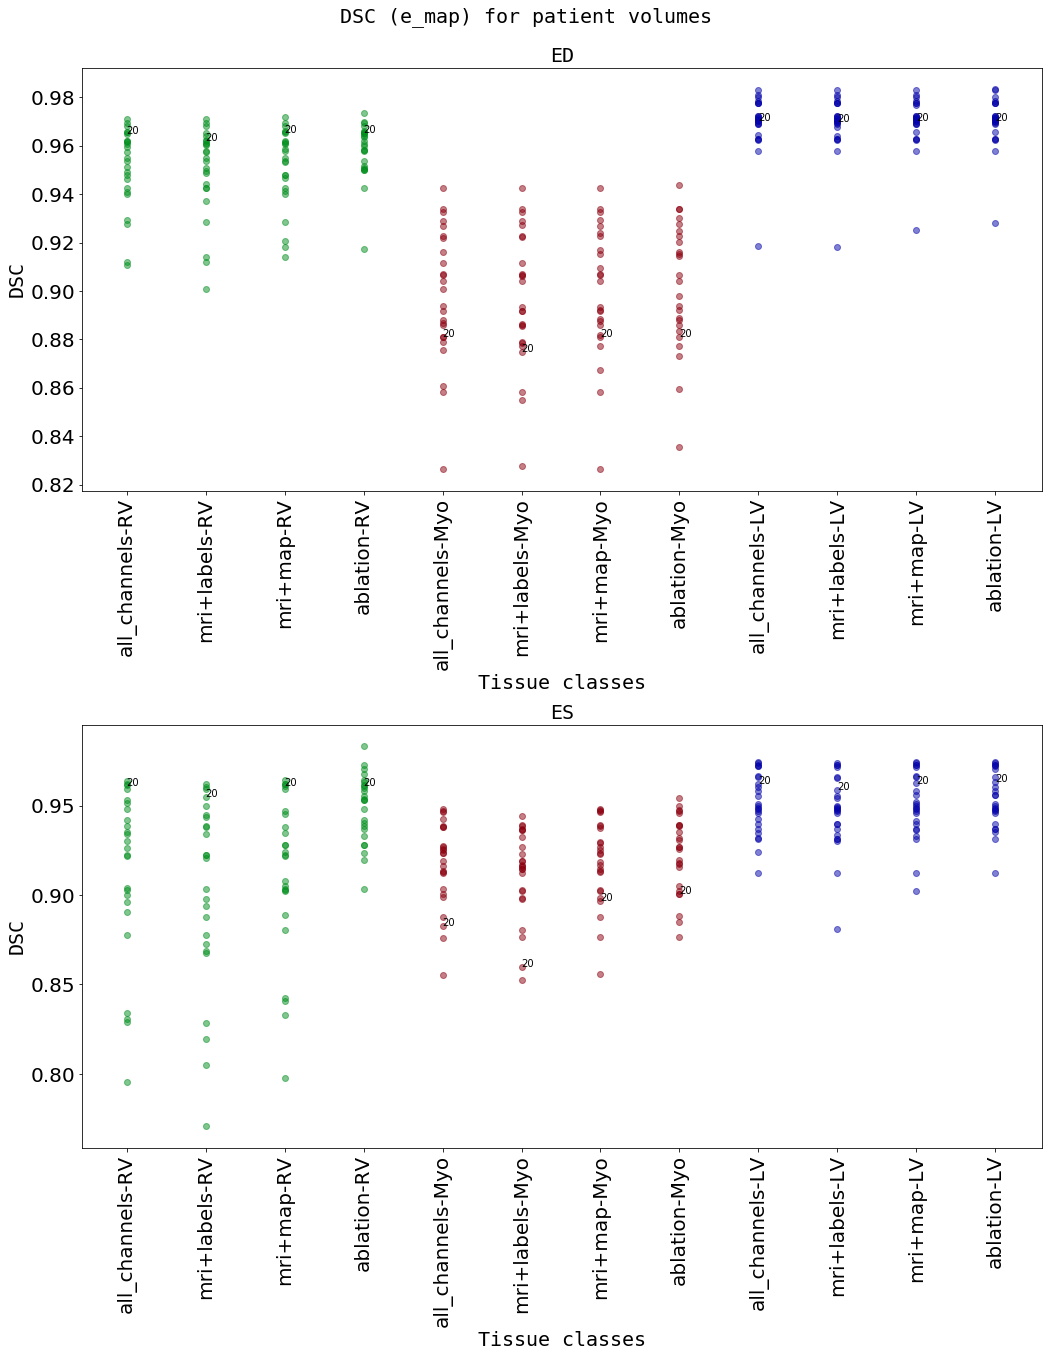

INFO - Successfully saved fig /home/jorg/models/region_detector/rd1/results/e_map/fixed_42_28/figures/model_compare_HD_pat_volumes.pdf


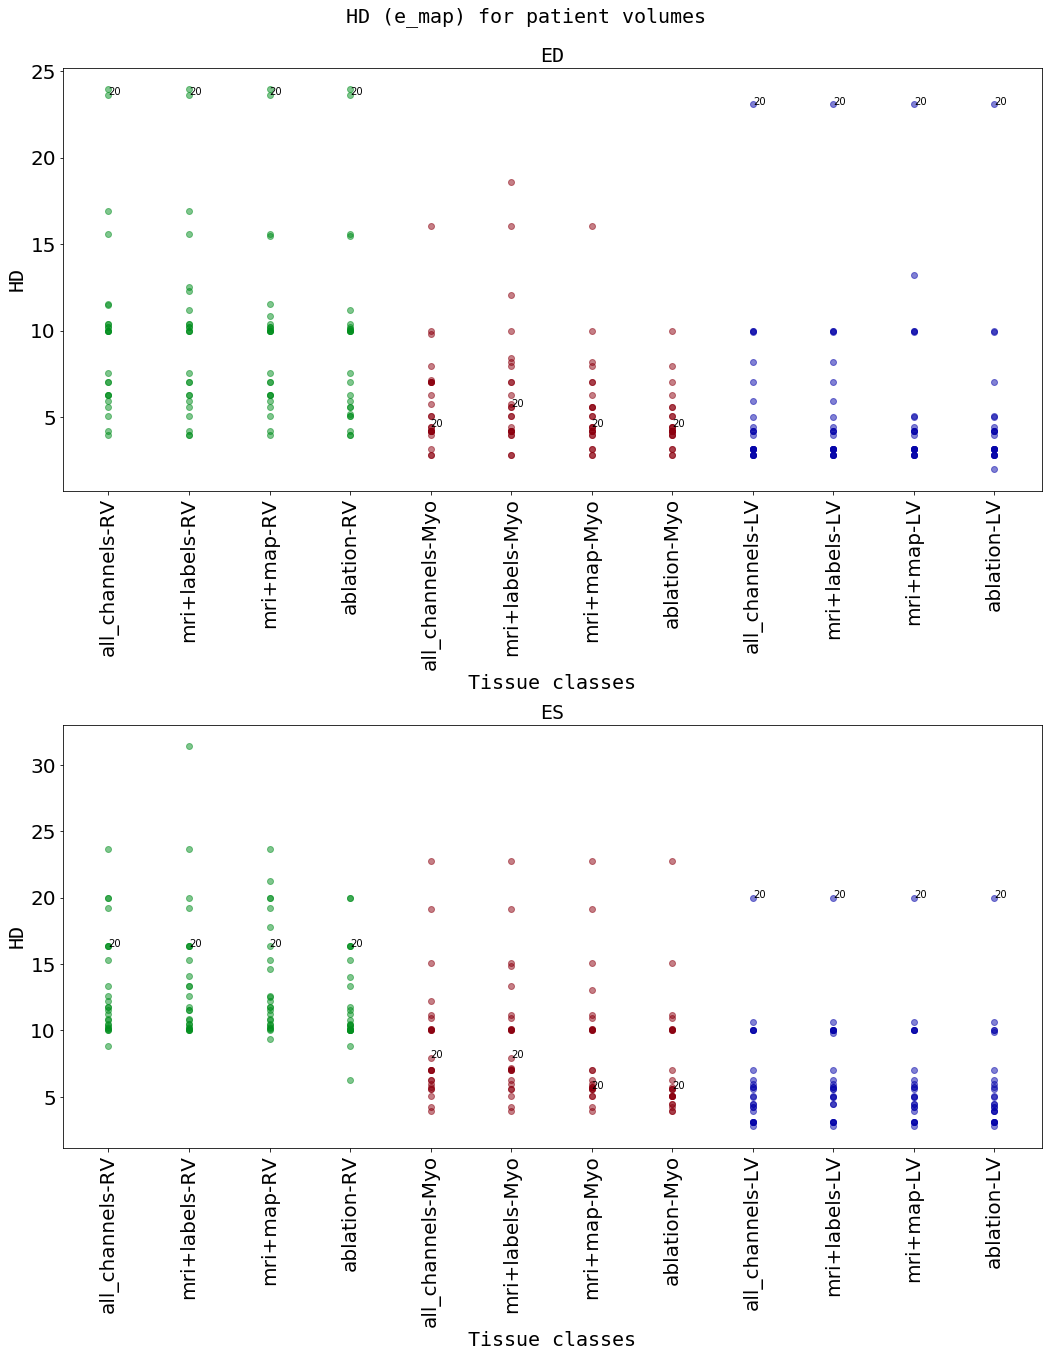

In [71]:
from plotting.detector.analyze_outliers import plot_volume_hist

mymodels = ["all_channels", "mri_labels", "mri_map", "model_compare"]  # all_channels  or "model_compare"
do_save = True

perf_types = ["DSC", "HD"]   # HD or DSC

for file_prefix in mymodels:
    compute_pvalues=False if file_prefix == "model_compare" else True
    for perf_type in perf_types:
        
        if file_prefix != "model_compare":
            if file_prefix == "mri_map":
                result_obj = result_mri_map
            elif file_prefix == "mri_labels":
                result_obj = result_mri_labels
            elif file_prefix == "all_channels":
                result_obj = result_all_channels
            res_label = ['base_seg', 'dt-all', 'rd1']
            result_objects = [result_base, result_correct_all, result_obj]
        else:
            res_label = ['all_channels', 'mri+labels', 'mri+map', "ablation"]
            result_objects = [result_all_channels, result_mri_labels, result_mri_map, result_ablation]

        pat_frame_ids = result_base["pat_frame_ids"]
        plot_volume_hist(pat_frame_ids, result_objects, 
                         perf_type=perf_type, res_label=res_label,
                         height=20, patient_ids=[20], do_save=do_save, compute_pvalues=compute_pvalues,
                         output_dir=fig_output_dir, file_prefix=file_prefix, type_of_map=type_of_map)

# Make boxplot diagrams

- In order to create the boxplots for the different models (each data point is a patient) we load the simulation results as TestResult object (**as_test_result=True**)

INFO - Successfully saved fig /home/jorg/models/region_detector/rd1/results/e_map/fixed_42_28/figures/all_channels_HD_box_plot.pdf


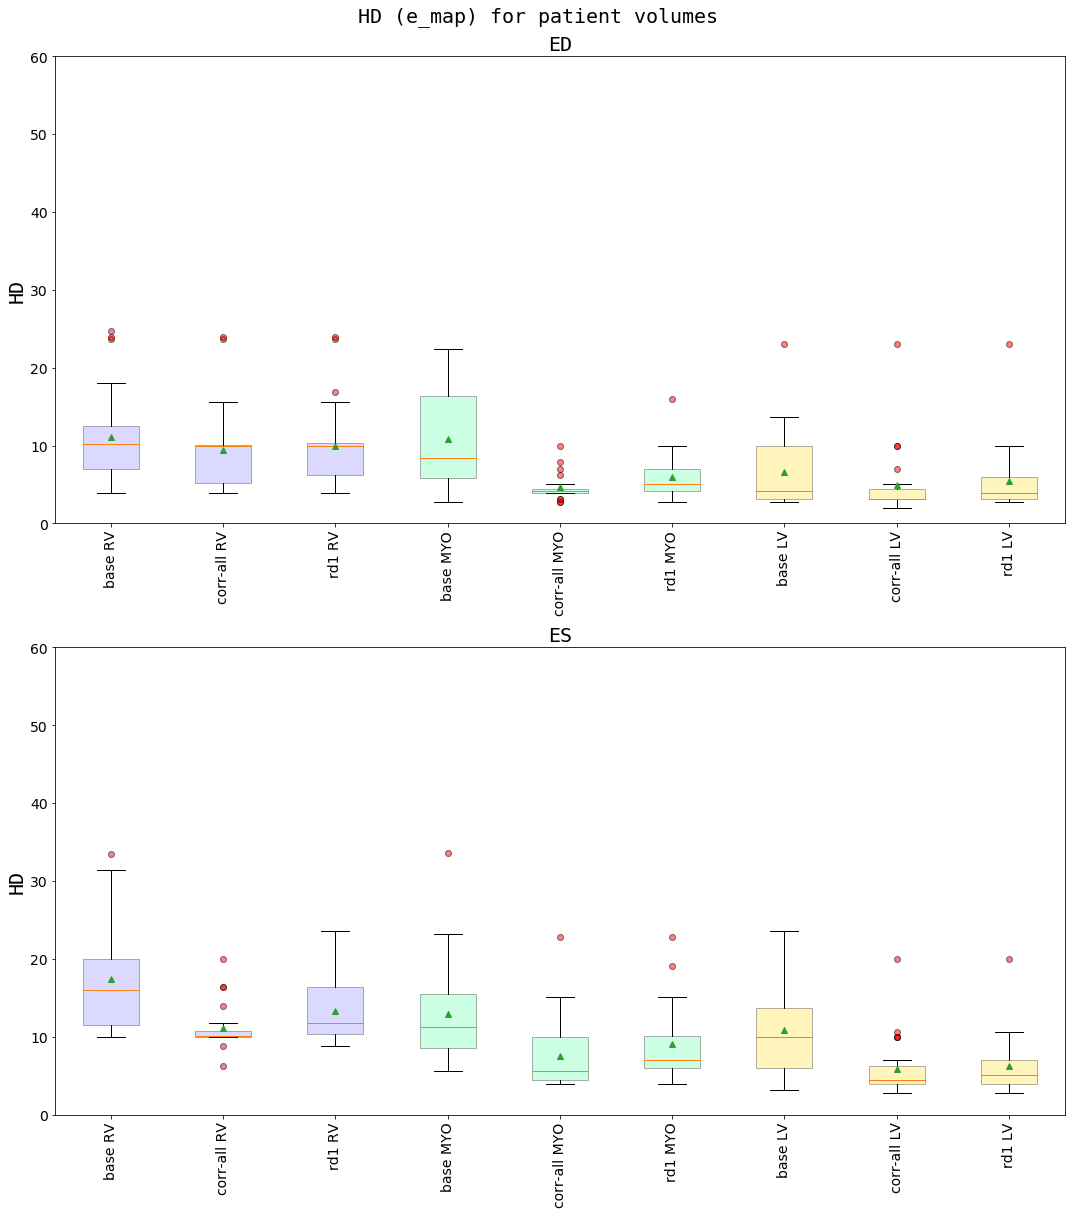

INFO - Successfully saved fig /home/jorg/models/region_detector/rd1/results/e_map/fixed_42_28/figures/all_channels_DSC_box_plot.pdf


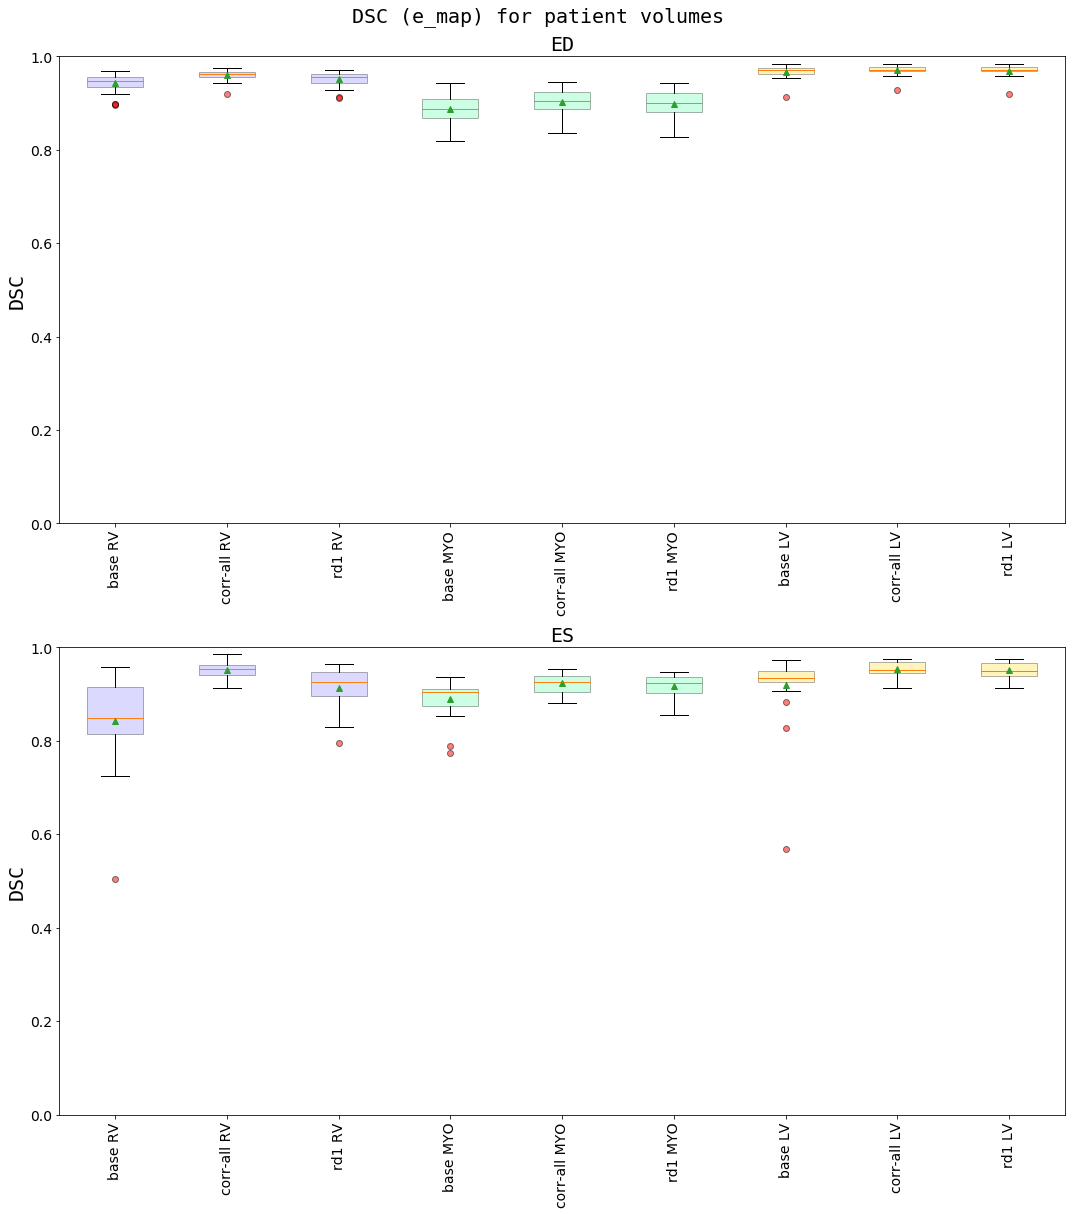

INFO - Comparing models using different input channels
INFO - Successfully saved fig /home/jorg/models/region_detector/rd1/results/e_map/fixed_42_28/figures/model_compare_HD_box_plot.pdf


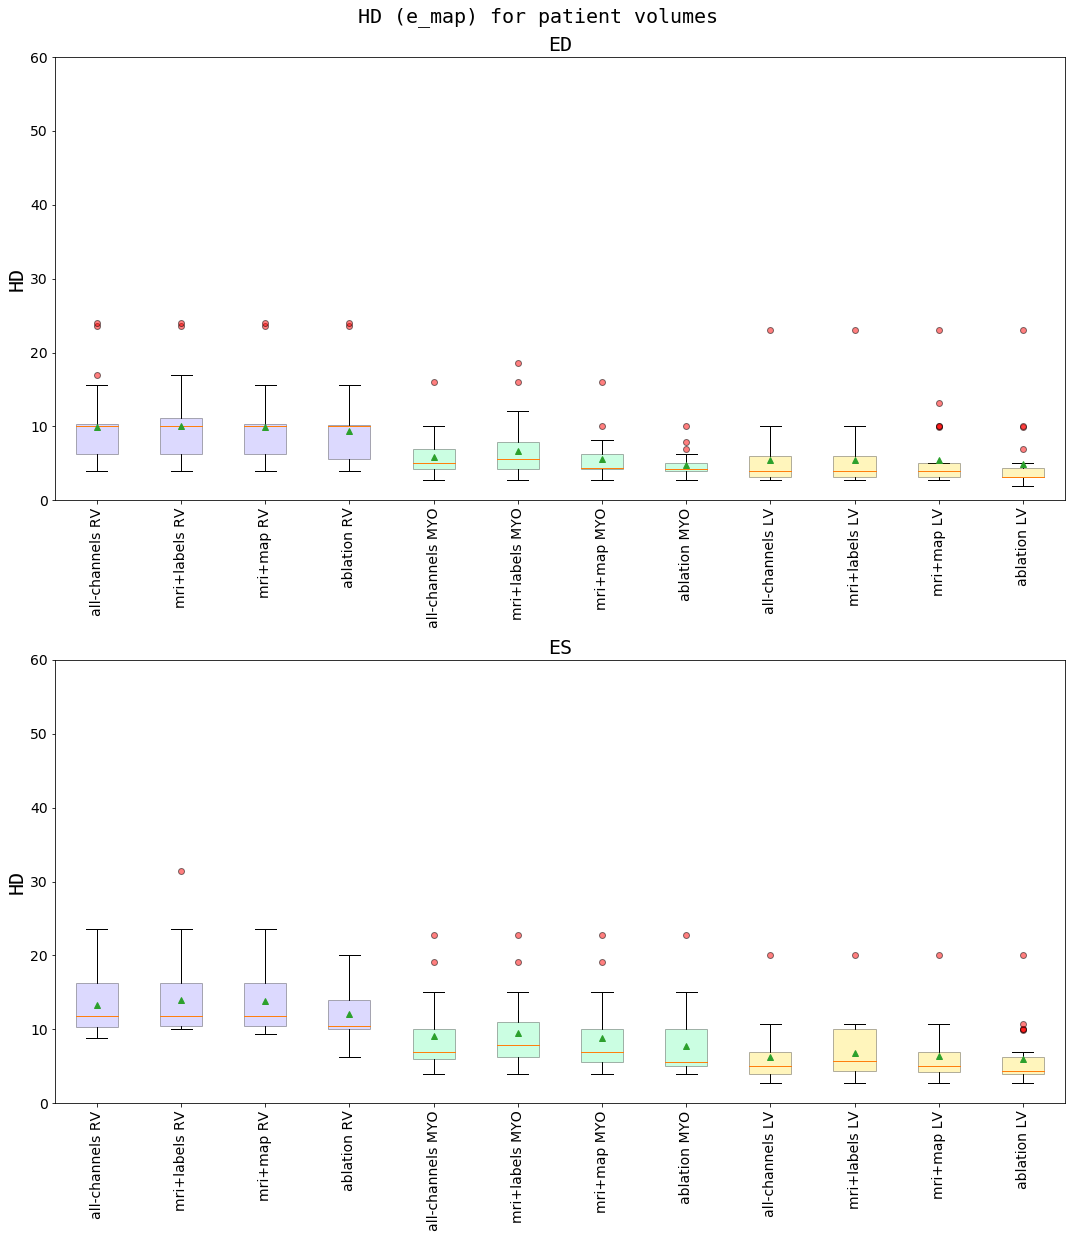

INFO - Comparing models using different input channels
INFO - Successfully saved fig /home/jorg/models/region_detector/rd1/results/e_map/fixed_42_28/figures/model_compare_DSC_box_plot.pdf


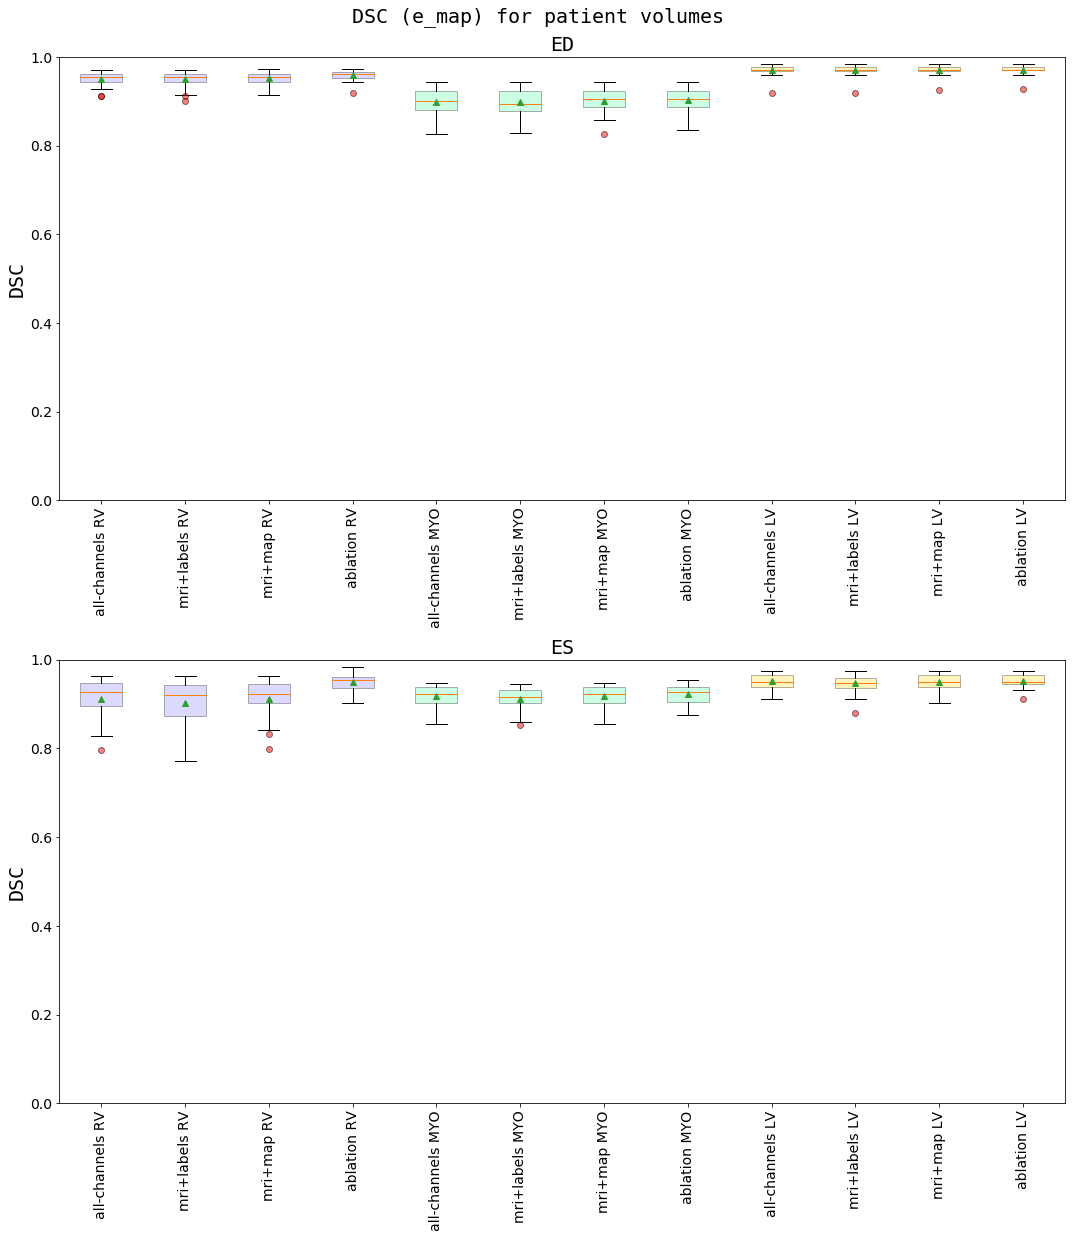

In [40]:
from plotting.box_plots import make_volume_box_plots

do_save = True
mymodels = ["all_channels", "model_compare"]  # all_channels or "model_compare" "all_channels", 
perf_types = ["HD", "DSC"]  # HD or DSC    slice-DSC   slice-HD

for file_suffix in mymodels:
    for perf_type in perf_types:
        if file_suffix != "model_compare":
            list_of_labels = ["base", "corr-all", "rd1"]
            result_model1 = result_base_tr
            result_model2 = result_correct_all_tr
            result_model3 = result_all_channels_tr
            result_model4 = None
        else:
            print("INFO - Comparing models using different input channels")
            list_of_labels = ["all-channels", "mri+labels", "mri+map", "ablation"]
            result_model1 = result_all_channels_tr
            result_model2 = result_mri_labels_tr
            result_model3 = result_mri_map_tr
            result_model4 = result_ablation_tr

        # this is our baseline, the performance of the segmentation model BEFORE detection
        eval_dice_model1, eval_hd_model1 = result_model1.get_boxplot_vectors()
        # this is our benchmark, if we would have detected ALL seg-errors for this model
        eval_dice_model2, eval_hd_model2 = result_model2.get_boxplot_vectors()
        # these are the result using the detection
        eval_dice_model3, eval_hd_model3 = result_model3.get_boxplot_vectors()
        if result_model4 is not None:
            eval_dice_model4, eval_hd_model4 = result_model4.get_boxplot_vectors()
        else:
            eval_dice_model4, eval_hd_model4 = None, None

        if perf_type == "DSC":
            list_of_vectors = [eval_dice_model1, eval_dice_model2, eval_dice_model3]
            if eval_dice_model4 is not None:
                list_of_vectors.append(eval_dice_model4)
        elif perf_type == "HD":
            list_of_vectors = [eval_hd_model1, eval_hd_model2, eval_hd_model3]
            if eval_hd_model4 is not None:
                list_of_vectors.append(eval_hd_model4)
                
        elif perf_type == "slice-DSC":
            list_of_vectors = [result_model1.bp_list_slice_dice, result_model2.bp_list_slice_dice, 
                               result_model3.bp_list_slice_dice]

        elif perf_type == "slice-HD":
            for cardiac_phase in result_model1.bp_list_slice_hd.keys():
                # 
                for cls_idx, hd_slice_array in result_model1.bp_list_slice_hd[cardiac_phase].items():
                    hd_null_indices = hd_slice_array == 0
                    result_model2.bp_list_slice_hd[cardiac_phase][cls_idx][hd_null_indices] = 0
                    result_model3.bp_list_slice_hd[cardiac_phase][cls_idx][hd_null_indices] = 0

            list_of_vectors = [result_model1.bp_list_slice_hd, 
                               result_model2.bp_list_slice_hd, 
                               result_model3.bp_list_slice_hd]
        elif perf_type == "surf-DSC":
            list_of_vectors = [result_model1.bp_list_surf_dice, result_model2.bp_list_surf_dice, 
                               result_model3.bp_list_surf_dice]
        else:
            raise ValueError("{} not supported".format(perf_type))


        make_volume_box_plots(list_of_vectors, list_of_labels, do_show=True, do_save=do_save, perf_type=perf_type,
                              output_dir=fig_output_dir, height=25, file_suffix=file_suffix, 
                              type_of_map=type_of_map)